In [102]:
import numpy as np
import matplotlib.pyplot as plt
import Modules.SQcircuit_extensions as sq_ext
import Modules.Fits as fits
from scipy.optimize import minimize
import qutip as qt
import os
import importlib
import pickle

importlib.reload(sq_ext)
importlib.reload(fits)

data_dir = r'/data'
opt_dir = r'/opt_results_low_energy/'

In [103]:
GHz     =   1e9
fF      =   1e-15
nH      =   1e-9
nmax_r  =   5
nmax_f  =   10

# Single circuit

## Qubit 1 [ Cooldown 1 ]

In [104]:
experiment_name = 'qubit_1_single_1'
load = False
# method = 'SLSQP'
method = 'Nelder-Mead'
# method = 'L-BF GS-B'
# method = 'TNC'
# method = 'Powell'
# method = 'COBYLA'


### Load spectral data and theoretical model

In [105]:
φ_ext_exp, ω_exp, I_exp, I0, Iss = fits.get_experimental_spectrum(experiment_name)
theoretical_spectrum = fits.get_theoretical_spectrum_low_ene(experiment_name)

#Remove the part of the spectrum around phi_ext = 0
φ_ext_exp = φ_ext_exp[:15]
ω_exp = ω_exp[:15]
I_exp = I_exp[:15]

### Guess parameters and set bounds

In [5]:
ω_q = 3.92 * GHz
μ = 17.45 * GHz

I0_guess = I0
I_origin_guess = Iss - I0/2

parameters_guess = [ω_q, μ, I0_guess, I_origin_guess]

parameter_names = ['ω_q_1', 'μ_1', 'I0', 'I_origin']
bounds = fits.create_bounds(parameters_guess)
data_set = ([I_exp, ω_exp])

### Plot guess to check

Text(0.5, 0, '$\\phi_{ext}$ ($\\phi_0$)')

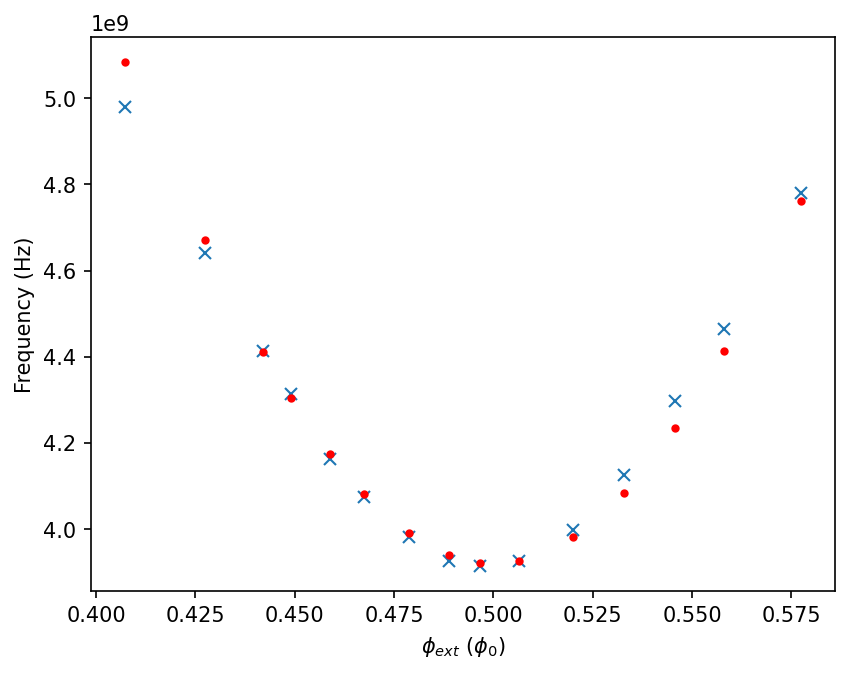

In [57]:
φ_ext_guess, ω_guess = theoretical_spectrum(parameters_guess, data_set, out='spectrum')
fig, ax1 = plt.subplots(dpi=150)
ax1.plot(φ_ext_exp, ω_exp, 'x')
ax1.plot(φ_ext_guess, ω_guess, 'r.')
ax1.set_ylabel('Frequency (Hz)')
ax1.set_xlabel(r'$\phi_{ext}$ ($\phi_0$)')


### Optimize or load previous optimization

In [58]:
data_set_path = os.path.join(os.getcwd() + opt_dir, experiment_name + '_data_set.pkl')
parameters_path = os.getcwd() + opt_dir + experiment_name + '.npz'
if load:
    with open(data_set_path, 'rb') as f:
        data_set = pickle.load(f)
    parameters_opt, parameters_guess, bounds = fits.load_optimization_results(experiment_name)
else:
    with open(data_set_path, 'wb') as f:
        pickle.dump(data_set, f)
    parameters_opt = minimize(theoretical_spectrum, parameters_guess, data_set, bounds=bounds, method=method, tol=1e-13).x
    np.savez(parameters_path, parameters_opt=parameters_opt,
             parameters_guess = np.array(parameters_guess), bounds=np.array(bounds))

0.38460462617074015
2.7086402878502494
0.614954778118229
4.39454815903632
4.758365896651396
8.953204146470275
1.7001085681045565
5.5417363795642185
2.2849570161198867
2.2360014901524567
2.9624322350605787
1.0205962206457815
2.461208087758831
1.1541441730158077
2.809995860809652
0.6140834437307139
1.259065012714902
0.6559174852343006
0.8965548470344568
0.4966504783956742
0.684348091322021
0.4461586556363268
0.7501921447897105
0.3155452117305727
0.7578840745753674
0.38627583959817124
0.5252752320188789
0.36652987065672205
0.32060448308914374
0.5072925615421057
0.3051802249702034
0.5954655678249055
0.29146656543276883
0.3881315329411836
0.2993953312097087
0.41670493901553296
0.2900400951568203
0.3069327663065405
0.28397047321057317
0.28517079363578174
0.3040425917535553
0.27878845188277485
0.316322367568727
0.2771535577325449
0.2858475760102625
0.2793218991418385
0.29546293041607524
0.2736396522070389
0.30241719314127635
0.2717564874159622
0.27551757282767486
0.2713423528448267
0.28294865

In [59]:
print('Guessed parameters \n')
[print(name + f' = {value:.4e}') for name, value in zip(parameter_names, parameters_guess)];
print('\n')
print('Optimized parameters \n')
[print(name + f' = {value:.4e}') for name, value in zip(parameter_names, parameters_opt)];

Guessed parameters 

ω_q_1 = 3.9200e+09
μ_1 = 1.7450e+10
I0 = 3.1700e-03
I_origin = -1.9350e-03


Optimized parameters 

ω_q_1 = 3.9236e+09
μ_1 = 1.7457e+10
I0 = 3.1662e-03
I_origin = -1.9390e-03


### Plot fits and errors

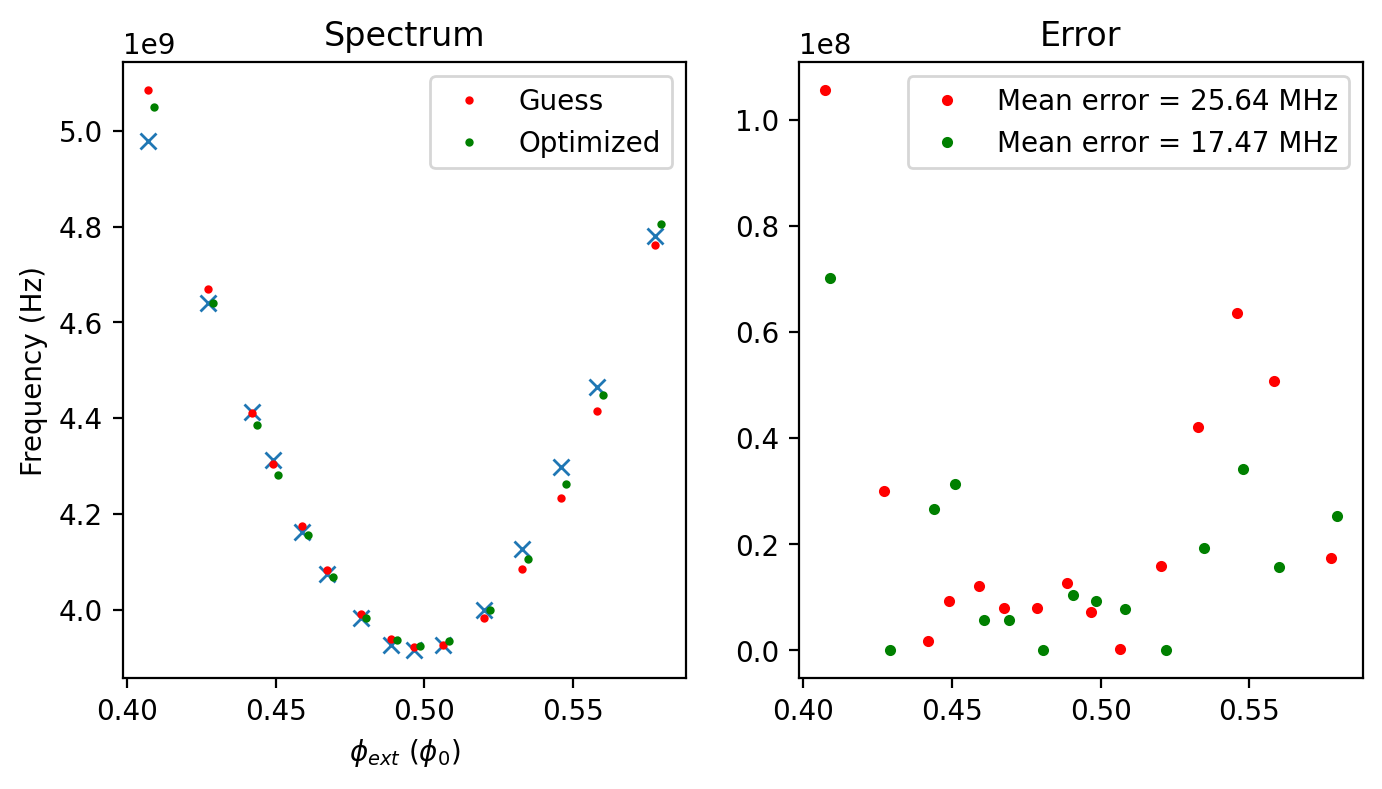

In [60]:
φ_ext_opt, ω_opt   = theoretical_spectrum(parameters_opt  , data_set,  out = 'spectrum')

fig, (ax1, ax2 )= plt.subplots(ncols=2, dpi=200, figsize=[8,4])
ax1.plot(φ_ext_exp  , ω_exp     , 'x')
ax1.plot(φ_ext_guess, ω_guess   , 'r.', markersize=4, label='Guess')
ax1.plot(φ_ext_opt  , ω_opt     , 'g.', markersize=4, label='Optimized')
ax1.set_ylabel('Frequency (Hz)')
ax1.set_xlabel('$\phi_{ext}$ ($\phi_0$)')
ax1.set_title('Spectrum')
ax1.legend()
ax2.set_title('Error')

ax2.plot(φ_ext_guess, np.abs(ω_guess-ω_exp), 'r.' , label = f'Mean error = {np.abs(ω_guess-ω_exp).mean()/1e6:.2f} MHz' )
ax2.plot(φ_ext_opt, np.abs(ω_opt-ω_exp), 'g.'   , label = f'Mean error = {np.abs(ω_opt-ω_exp).mean()/1e6:.2f} MHz'  )
ax2.legend()

## Resonator 1 [ Cooldown 1 ]

In [87]:
experiment_name = 'resonator_1_single_1'
load = False

### Load spectral data and theoretical model

In [88]:
φ_ext_exp, ω_exp, I_exp, I0, Iss = fits.get_experimental_spectrum(experiment_name)

In [89]:
theoretical_spectrum = fits.get_theoretical_spectrum_low_ene(experiment_name)

## Guess parameters and set bounds

In [90]:
ω_q, μ, _, _ = np.load(os.getcwd() + opt_dir +  'qubit_1_single_1' + '.npz')['parameters_opt']
ω_r = 6.6 * GHz
ω_q = 4.26 * GHz
g_Φ = 0.226 * GHz

I0_guess = I0
I_origin_guess = Iss - I0/2


crossing_index_1  = 13
crossing_index_2  = 10


parameter_names = ['ω_q', 'μ', 'ω_r', 'g_Φ', 'I0_guess', 'I_origin_guess' ]
parameters_guess = [ω_q, μ, ω_r, g_Φ, I0_guess, I_origin_guess ]
data_set = ([I_exp, ω_exp, crossing_index_1, crossing_index_2])
bounds = fits.create_bounds(parameters_guess)

### Plot guess to check

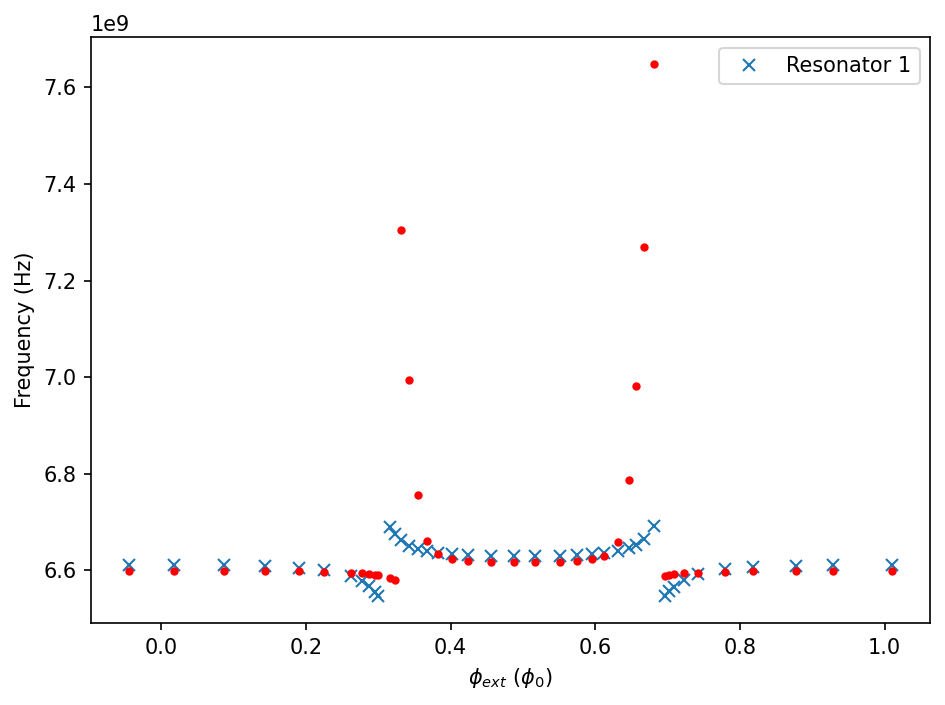

In [91]:
φ_ext_guess, ω_guess = theoretical_spectrum(parameters_guess, data_set, out='spectrum')

fig, ax = plt.subplots(dpi=150)
ax.plot(φ_ext_guess, ω_exp, marker='x', ls='', label='Resonator 1')
ax.plot(φ_ext_guess, ω_guess, '.r')

ax.set_ylabel('Frequency (Hz)')
ax.set_xlabel('$\phi_{ext}$ ($\phi_0$)')
ax.legend()
fig.tight_layout()

### Optimize or load previous optimization

In [92]:
data_set_path = os.path.join(os.getcwd() + opt_dir, experiment_name + '_data_set.pkl')
parameters_path = os.getcwd() + opt_dir + experiment_name + '.npz'
if load:
    with open(data_set_path, 'rb') as f:
        data_set = pickle.load(f)
    parameters_opt, parameters_guess, bounds = fits.load_optimization_results(experiment_name)
else:
    with open(data_set_path, 'wb') as f:
        pickle.dump(data_set, f)
    parameters_opt = minimize(theoretical_spectrum, parameters_guess, data_set, bounds=bounds, method='Nelder-Mead', tol=1e-14).x
    np.savez(parameters_path, parameters_opt=parameters_opt,
             parameters_guess = np.array(parameters_guess), bounds=np.array(bounds))

3.8179078606823293
4.669479242120413
5.280041294047955
15.082990964273502
3.836013534387953
3.3201646138302
6.802809886538476
14.53607041178423
8.980703154723683
9.044773005516948
6.18169248781713
6.831287811093936
4.768582760777977
6.007911229158987
4.738926410964685
2.443274198516446
1.733765992140401
3.8508527768089045
2.9736204048795796
2.0189963164018336
2.7802623677105025
2.1307294791684837
2.67364534944123
1.3920171440081721
1.908114308569127
0.8841557343181019
1.5068660348449592
3.0599383624863585
1.7752674161436062
1.7059938971313495
1.4079351271896496
1.6793591172274027
1.4966297643261481
1.212609045499361
1.1371882871011314
1.0438858430286408
1.7554078765111227
0.8603053540791664
1.9587518096776362
0.8729590213600139
1.3220904088390857
0.8474155221598901
1.340718057785449
0.8096587700311251
1.2461989508265543
0.7717304156432371
1.1850268191642341
0.7272043882965813
1.138023873269846
0.677899144571991
0.8344622113992519
1.040786636175828
0.6661239656257057
0.9110983982389527


In [93]:
print('Guessed parameters \n')
[print(name + f' = {value:.4e}') for name, value in zip(parameter_names, parameters_guess)];
print('\n')
print('Optimized parameters \n')
[print(name + f' = {value:.4e}') for name, value in zip(parameter_names, parameters_opt)];

Guessed parameters 

ω_q = 4.2600e+09
μ = 1.7457e+10
ω_r = 6.6000e+09
g_Φ = 2.2600e+08
I0_guess = 3.1700e-03
I_origin_guess = -1.9350e-03


Optimized parameters 

ω_q = 4.3697e+09
μ = 1.4542e+10
ω_r = 6.6119e+09
g_Φ = 2.2189e+08
I0_guess = 3.3546e-03
I_origin_guess = -2.0079e-03


### Plot fits and errors

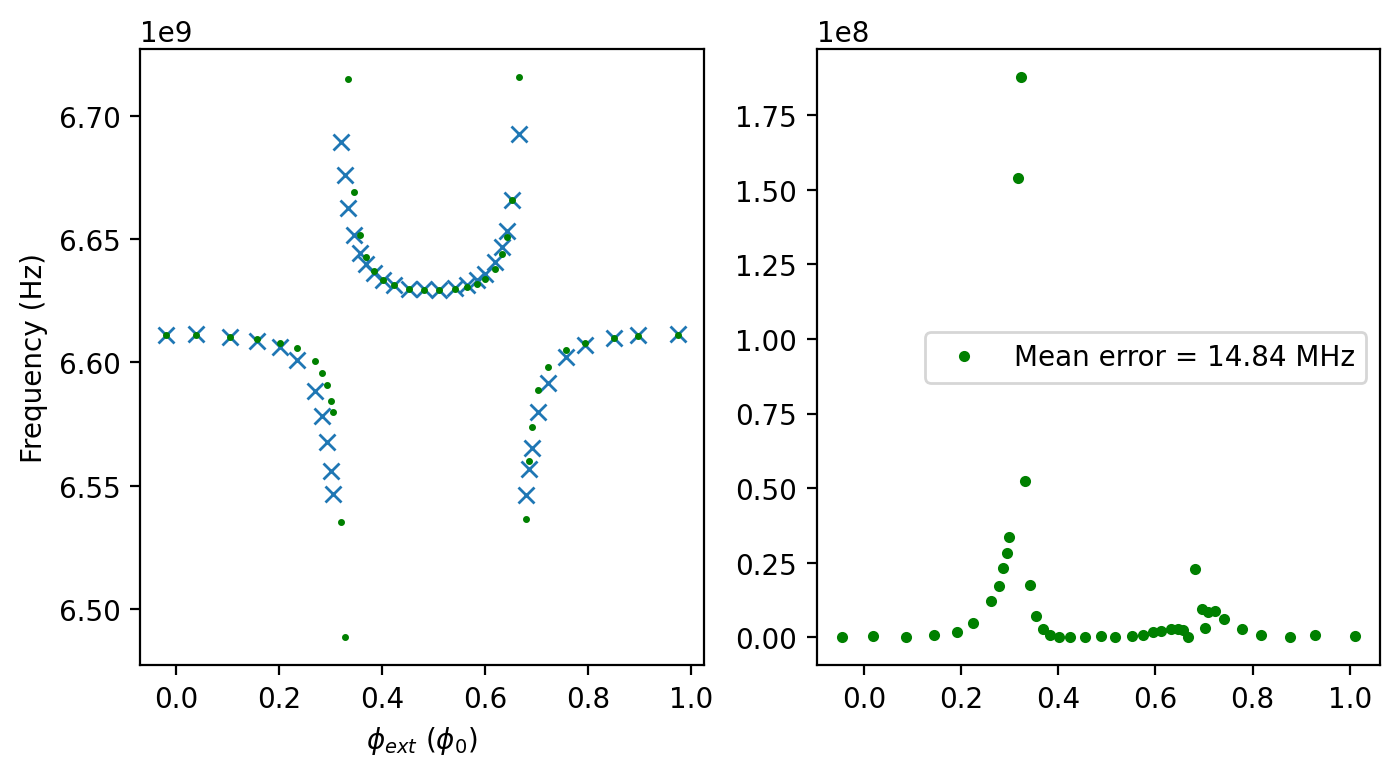

In [95]:
φ_ext_opt, ω_opt = theoretical_spectrum(parameters_opt, data_set, out='spectrum')

fig, (ax1, ax2 )= plt.subplots(ncols=2, dpi=200, figsize=[8,4])
ax1.plot(φ_ext_opt  , ω_exp, marker='x', ls='', label='Resonator 1')
# ax1.plot(φ_ext_guess, ω_guess, '.r', markersize=3)
ax1.plot(φ_ext_opt  , ω_opt, 'g.', markersize=3)
ax1.set_ylabel('Frequency (Hz)')
ax1.set_xlabel('$\phi_{ext}$ ($\phi_0$)')

# ax2.plot(φ_ext_exp, np.abs(ω_guess - ω_exp), 'r.', label = f'Mean error = {np.abs(ω_guess-ω_exp).mean()/1e6:.2f} MHz' )
ax2.plot(φ_ext_exp, np.abs(ω_opt   - ω_exp), 'g.', label = f'Mean error = {np.abs(ω_opt-ω_exp).mean()/1e6:.2f} MHz'  )
ax2.legend()

 ## Qubit 1 and Resonator 1 [Cooldown 1]

In [43]:
experiment_name = 'resonator_and_qubit_1_single_1'


### Load spectral data and theoretical model

In [44]:
φ_ext_exp_F, ω_exp_F, I_exp_F, I0_F, Iss_F, φ_ext_exp_R, ω_exp_R, I_exp_R, I0_R, Iss_R = (
    fits.get_experimental_spectrum(experiment_name))

In [45]:
theoretical_spectrum = fits.get_theoretical_spectrum(experiment_name)

### Guess parameters and set bounds

In [46]:
CF_1, LF_1, EJ_1, I0_F_1, I_origin_F_1= np.load(os.getcwd() + opt_dir +  'qubit_1_single_1' + '.npz')['parameters_opt']
CR_1, LR_1, Δ_1, I0_R_1, I_origin_R_1 = np.load(os.getcwd() + opt_dir +  'resonator_1_single_1' + '.npz')['parameters_opt']

crossing_index_1_F = 15
crossing_index_1_R = 11
crossing_index_2_R = 10
nmax_r = 5
nmax_f = 15

data_set = ([I_exp_F, ω_exp_F, I_exp_R, ω_exp_R, crossing_index_1_F, crossing_index_1_R, crossing_index_2_R, nmax_r, nmax_f])
parameters_guess = [CF_1, LF_1, EJ_1, I0_F_1, I_origin_F_1, CR_1, LR_1, Δ_1, I0_R_1, I_origin_R_1]

parameter_names = ['CF_1', 'LF_1', 'EJ_1', 'I0_F_1', 'I_origin_F_1',
                   'CR_1', 'LR_1', 'Δ_1', 'I0_R_1', 'I_origin_R_1']

bounds = fits.create_bounds(parameters_guess)

### Plot guess to check

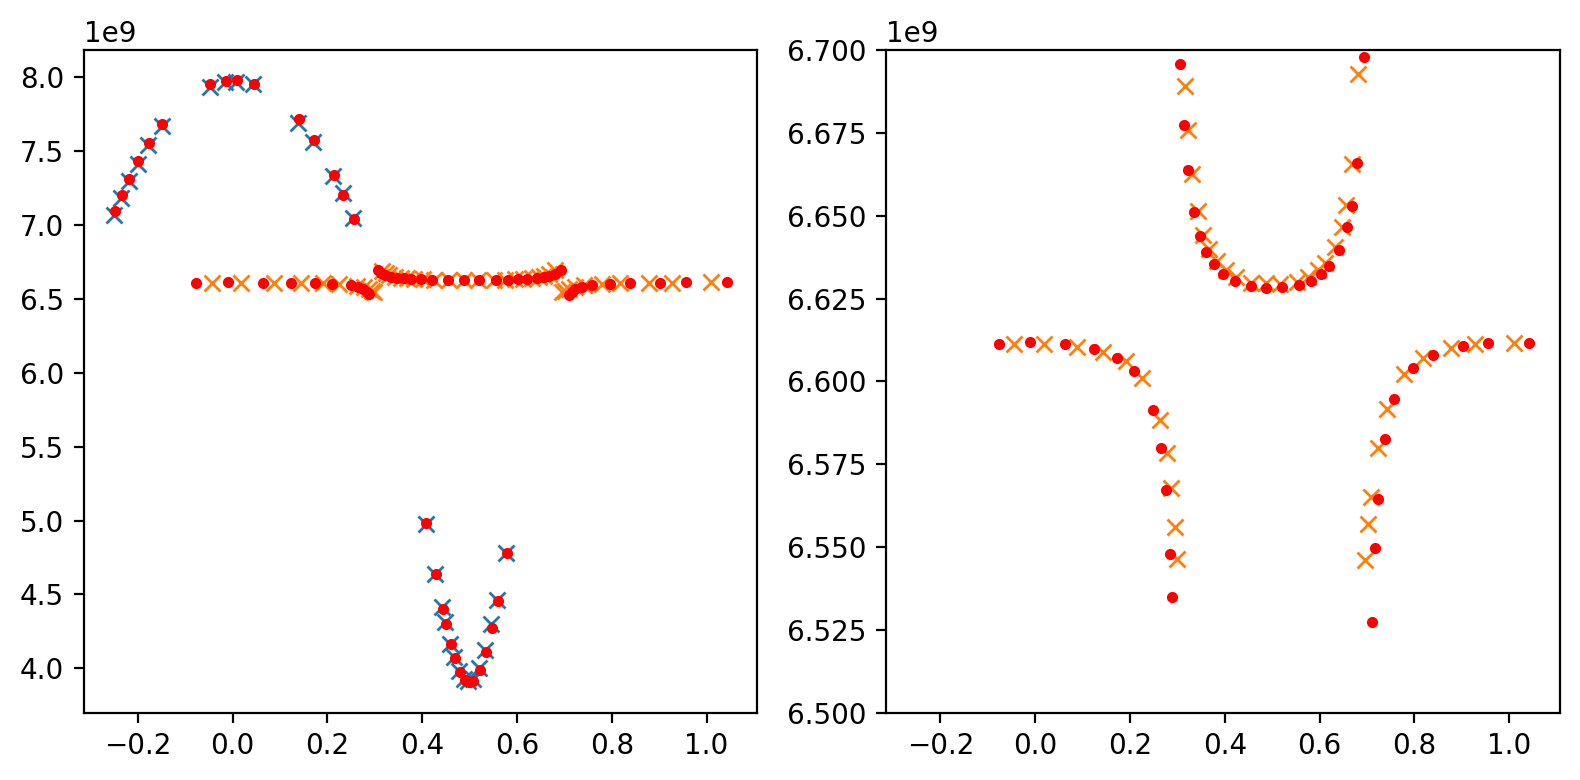

In [47]:
φ_ext_F_guess, ωF_vs_φ_ext_guess, φ_ext_R_guess, ωR_vs_φ_ext_guess = theoretical_spectrum(parameters_guess, data_set, out='spectrum')

fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=[8,4], dpi=200)
for ax in (ax1, ax2):
    ax.plot(φ_ext_exp_F, ω_exp_F, 'x')
    ax.plot(φ_ext_exp_R, ω_exp_R, 'x')
    ax.plot(φ_ext_F_guess, ωF_vs_φ_ext_guess, '.r')
    ax.plot(φ_ext_R_guess, ωR_vs_φ_ext_guess, '.r')
    
ax2.set_ylim([6.5e9,6.7e9])
fig.tight_layout()

### Optimize or load previous optimization

In [48]:
data_set_path = os.path.join(os.getcwd() + opt_dir, experiment_name + '_data_set.pkl')
parameters_path = os.getcwd() + opt_dir + experiment_name + '.npz'
if load:
    with open(data_set_path, 'rb') as f:
        data_set = pickle.load(f)
    parameters_opt, parameters_guess, bounds = fits.load_optimization_results(experiment_name)
else:
    with open(data_set_path, 'wb') as f:
        pickle.dump(data_set, f)
    parameters_opt = minimize(theoretical_spectrum, parameters_guess, data_set, bounds=bounds, method=method).x
    np.savez(parameters_path, parameters_opt=parameters_opt,
             parameters_guess = np.array(parameters_guess), bounds=np.array(bounds))

In [49]:
print('Guessed parameters \n')
[print(name + f' = {value:.3f}') for name, value in zip(parameter_names, parameters_guess)];
print('\n')
print('Optimized parameters \n')
[print(name + f' = {value:.3f}') for name, value in zip(parameter_names, parameters_opt)];

Guessed parameters 

CF_1 = 24.470
LF_1 = 27.640
EJ_1 = 5.060
I0_F_1 = 0.003
I_origin_F_1 = -0.002
CR_1 = 5.757
LR_1 = 100.356
Δ_1 = 1.042
I0_R_1 = 0.003
I_origin_R_1 = -0.002


Optimized parameters 

CF_1 = 24.271
LF_1 = 27.891
EJ_1 = 4.999
I0_F_1 = 0.003
I_origin_F_1 = -0.002
CR_1 = 5.757
LR_1 = 100.346
Δ_1 = 1.047
I0_R_1 = 0.003
I_origin_R_1 = -0.002


### Plot fits and errors

(6550000000.0, 6650000000.0)

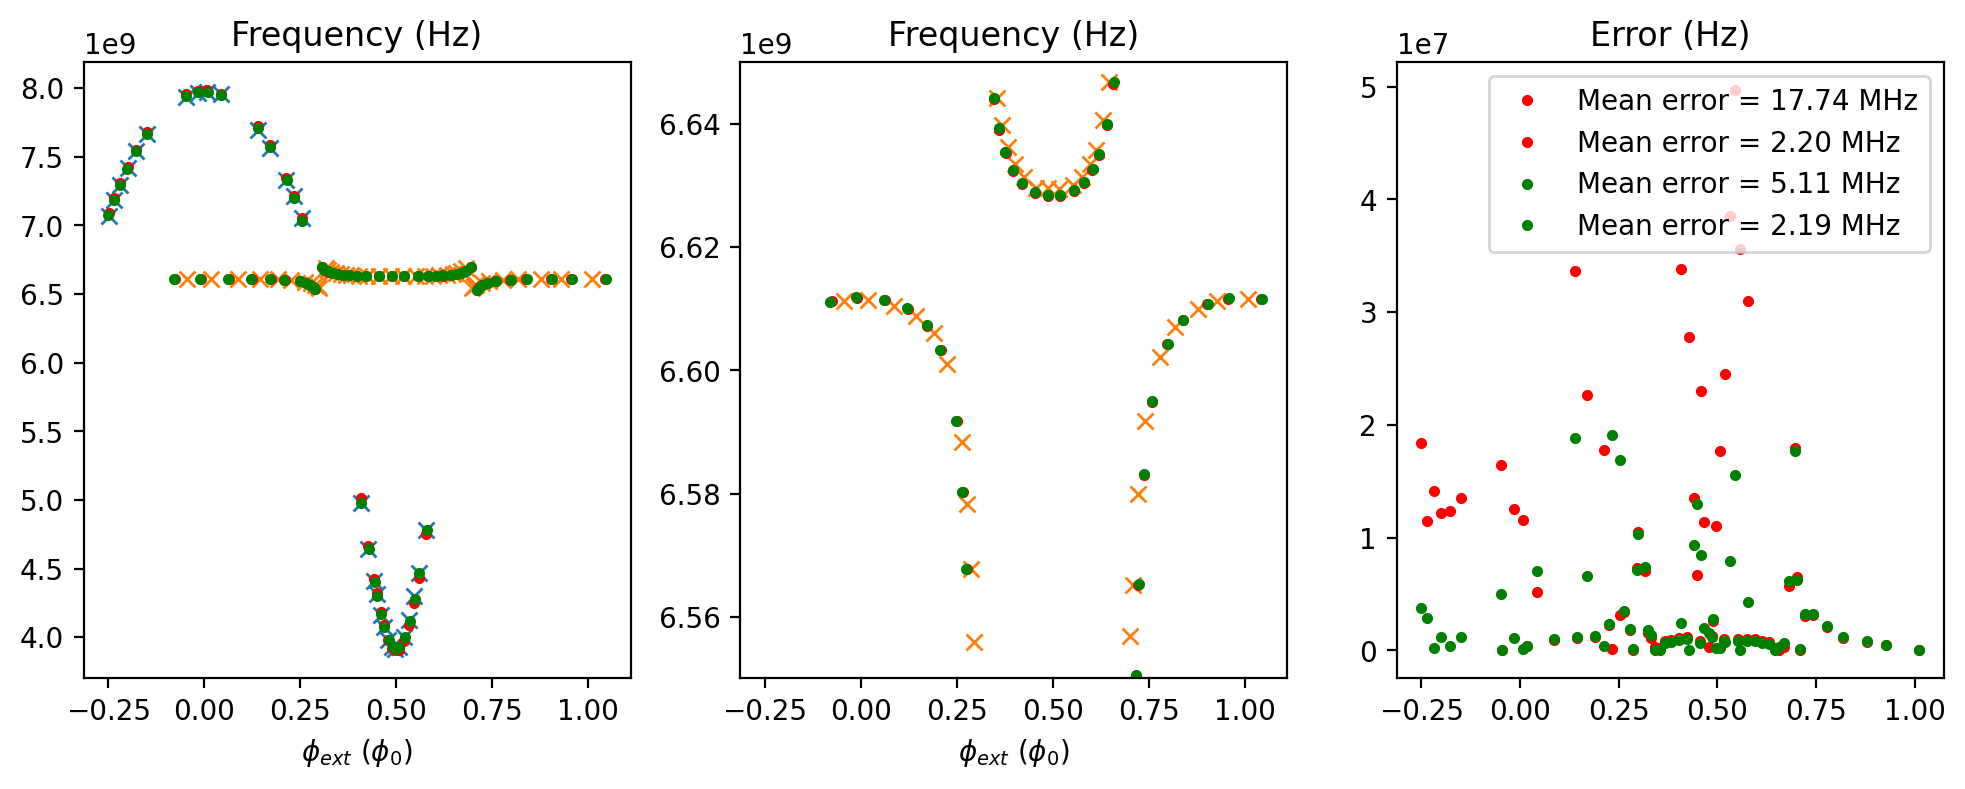

In [31]:
φ_ext_F_opt, ωF_vs_φ_ext_opt, φ_ext_R_opt, ωR_vs_φ_ext_opt = theoretical_spectrum(parameters_opt, data_set, out='spectrum')

fig, (ax1, ax2, ax3) = plt.subplots(ncols=3, figsize=[4*3,4], dpi=200)
for ax in (ax1, ax2):
    ax.plot(φ_ext_exp_F     , ω_exp_F   , 'x')
    ax.plot(φ_ext_exp_R     , ω_exp_R   , 'x')
    ax.plot(φ_ext_F_guess   , ωF_vs_φ_ext_guess , '.r')
    ax.plot(φ_ext_R_guess   , ωR_vs_φ_ext_guess , '.r')
    ax.plot(φ_ext_F_opt     , ωF_vs_φ_ext_opt   , '.g')
    ax.plot(φ_ext_R_opt     , ωR_vs_φ_ext_opt   , '.g')
    ax.set_xlabel('$\phi_{ext}$ ($\phi_0$)')

ax3.plot(φ_ext_exp_F, np.abs(ωF_vs_φ_ext_guess - ω_exp_F), 'r.' , label = f'Mean error = {np.abs(ωF_vs_φ_ext_guess-ω_exp_F).mean()/1e6:.2f} MHz' )
ax3.plot(φ_ext_exp_R, np.abs(ωR_vs_φ_ext_guess - ω_exp_R), 'r.' , label = f'Mean error = {np.abs(ωR_vs_φ_ext_guess-ω_exp_R).mean()/1e6:.2f} MHz'  )
ax3.plot(φ_ext_exp_F, np.abs(ωF_vs_φ_ext_opt   - ω_exp_F), 'g.' , label = f'Mean error = {np.abs(ωF_vs_φ_ext_opt   - ω_exp_F).mean()/1e6:.2f} MHz' )
ax3.plot(φ_ext_exp_R, np.abs(ωR_vs_φ_ext_opt   - ω_exp_R), 'g.' , label = f'Mean error = {np.abs(ωR_vs_φ_ext_opt   - ω_exp_R).mean()/1e6:.2f} MHz'  )
ax3. legend()
ax1.set_title('Frequency (Hz)')
ax2.set_title('Frequency (Hz)')
ax3.set_title('Error (Hz)')
ax2.set_ylim([6.55e9,6.65e9])


## Qubit 1 and Resonator 1 [Cooldown 2]

In [295]:
experiment_name = 'resonator_and_qubit_1_single_2'


### Load spectral data and theoretical model

In [296]:
φ_ext_exp_F, ω_exp_F, I_exp_F, I0_F, Iss_F, φ_ext_exp_R, ω_exp_R, I_exp_R, I0_R, Iss_R = (
    fits.get_experimental_spectrum(experiment_name))

In [297]:
theoretical_spectrum = fits.get_theoretical_spectrum(experiment_name)

### Guess parameters and set bounds

In [298]:
CF_1, LF_1, EJ_1, _, _, CR_1, LR_1, Δ_1, _, _ = np.load(os.getcwd() + opt_dir +  'resonator_and_qubit_1_single_1' + '.npz')['parameters_opt']

I0_F_1 = I0_F
I_origin_F_1 = Iss_F - I0_F/2

I0_R_1 = I0_R
I_origin_R_1 = Iss_R - I0_R/2

crossing_index_1_F = 30
crossing_index_1_R = 10
crossing_index_2_R = 10
nmax_r = 5
nmax_f = 15

data_set = ([I_exp_F, ω_exp_F, I_exp_R, ω_exp_R, crossing_index_1_F, crossing_index_1_R, crossing_index_2_R, nmax_r, nmax_f])
parameters_guess = [CF_1, LF_1, EJ_1, I0_F_1, I_origin_F_1, CR_1, LR_1, Δ_1, I0_R_1, I_origin_R_1]

parameter_names = ['CF_1', 'LF_1', 'EJ_1', 'I0_F_1', 'I_origin_F_1',
                   'CR_1', 'LR_1', 'Δ_1', 'I0_R_1', 'I_origin_R_1']

bounds = fits.create_bounds(parameters_guess)

### Plot guess to check

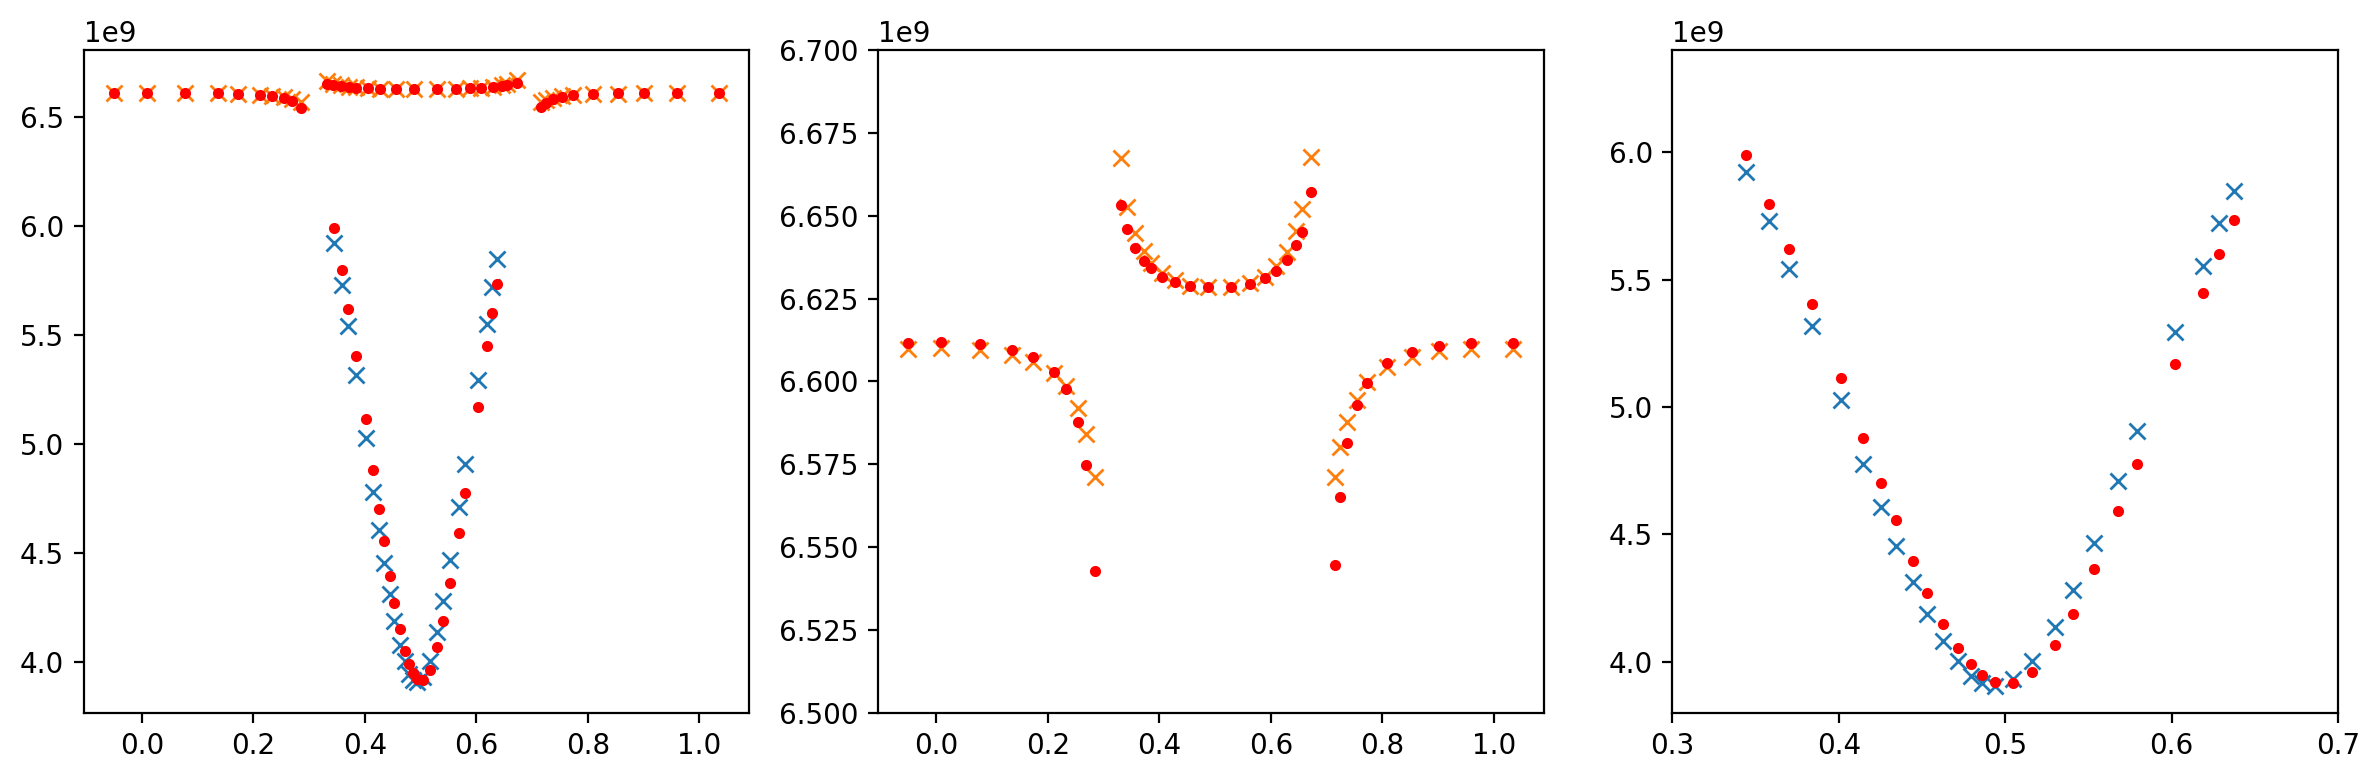

In [299]:
φ_ext_F_guess, ωF_vs_φ_ext_guess, φ_ext_R_guess, ωR_vs_φ_ext_guess = theoretical_spectrum(parameters_guess, data_set, out='spectrum')

fig, (ax1, ax2, ax3) = plt.subplots(ncols=3, figsize=[12,4], dpi=200)
for ax in (ax1, ax2, ax3):
    ax.plot(φ_ext_exp_F, ω_exp_F, 'x')
    ax.plot(φ_ext_F_guess, ωF_vs_φ_ext_guess, '.r')
    ax.plot(φ_ext_exp_R, ω_exp_R, 'x')
    ax.plot(φ_ext_R_guess, ωR_vs_φ_ext_guess, '.r')
    
ax2.set_ylim([6.5e9,6.7e9])
ax3.set_ylim([3.8e9, 6.4e9])
ax3.set_xlim([0.3,0.7])
#ax.set_ylabel(r'$')
#ax.set_xlabel(r'$')
#ax.set_title(r'$')
fig.tight_layout()

### Optimize or load previous optimization

In [300]:
if load:
    parameters_opt, parameters_guess, bounds = fits.load_optimization_results(experiment_name)
else:
    parameters_opt = minimize(theoretical_spectrum, parameters_guess, data_set, bounds=bounds).x
    np.savez(os.getcwd() + opt_dir + experiment_name + '.npz', parameters_opt=parameters_opt,
             parameters_guess = np.array(parameters_guess), bounds=np.array(bounds))

2.270262216789377
2.2702622145833407
2.270262213547341
2.2702622065216205
2.270772059457286
2.271307742439048
2.2702622601241242
2.270262219282409
2.270262215530952
2.2702743468749045
2.270266571936125
72.88738795486253
72.88738793886708
72.88738795180709
72.8873878795528
72.88691184537151
72.88663998732594
72.88738772535157
72.88738794434755
72.88738794714338
72.88720247995509
72.88714212230326
5.175099674055779
5.175099678641512
5.175099681944944
5.175099706173825
5.174585599089385
5.174072843073023
5.175099470746175
5.175099662652253
5.175099673306864
5.175082495576055
5.1750753667069835
1.6058630934969491
1.6058630902778335
1.6058630908625218
1.6058630956206557
1.6063786603343755
1.6069129755972438
1.6058628960940986
1.6058630822467346
1.6058630910346259
1.6058458629549635
1.6058406960459686
36.10349257969182
36.103492573641745
36.10349257856296
36.10349261844591
36.103073981088514
36.10281226569865
36.10349235901687
36.103492567133735
36.103492574265715
36.10351692405327
36.103538

In [301]:
print('Guessed parameters \n')
[print(name + f' = {value:.3f}') for name, value in zip(parameter_names, parameters_guess)];
print('\n')
print('Optimized parameters \n')
[print(name + f' = {value:.3f}') for name, value in zip(parameter_names, parameters_opt)];

Guessed parameters 

CF_1 = 24.271
LF_1 = 27.891
EJ_1 = 4.999
I0_F_1 = 0.003
I_origin_F_1 = -0.000
CR_1 = 5.757
LR_1 = 100.346
Δ_1 = 1.047
I0_R_1 = 0.003
I_origin_R_1 = -0.000


Optimized parameters 

CF_1 = 24.271
LF_1 = 27.892
EJ_1 = 5.001
I0_F_1 = 0.003
I_origin_F_1 = -0.000
CR_1 = 5.755
LR_1 = 100.346
Δ_1 = 1.048
I0_R_1 = 0.003
I_origin_R_1 = -0.000


### Plot fits and errors

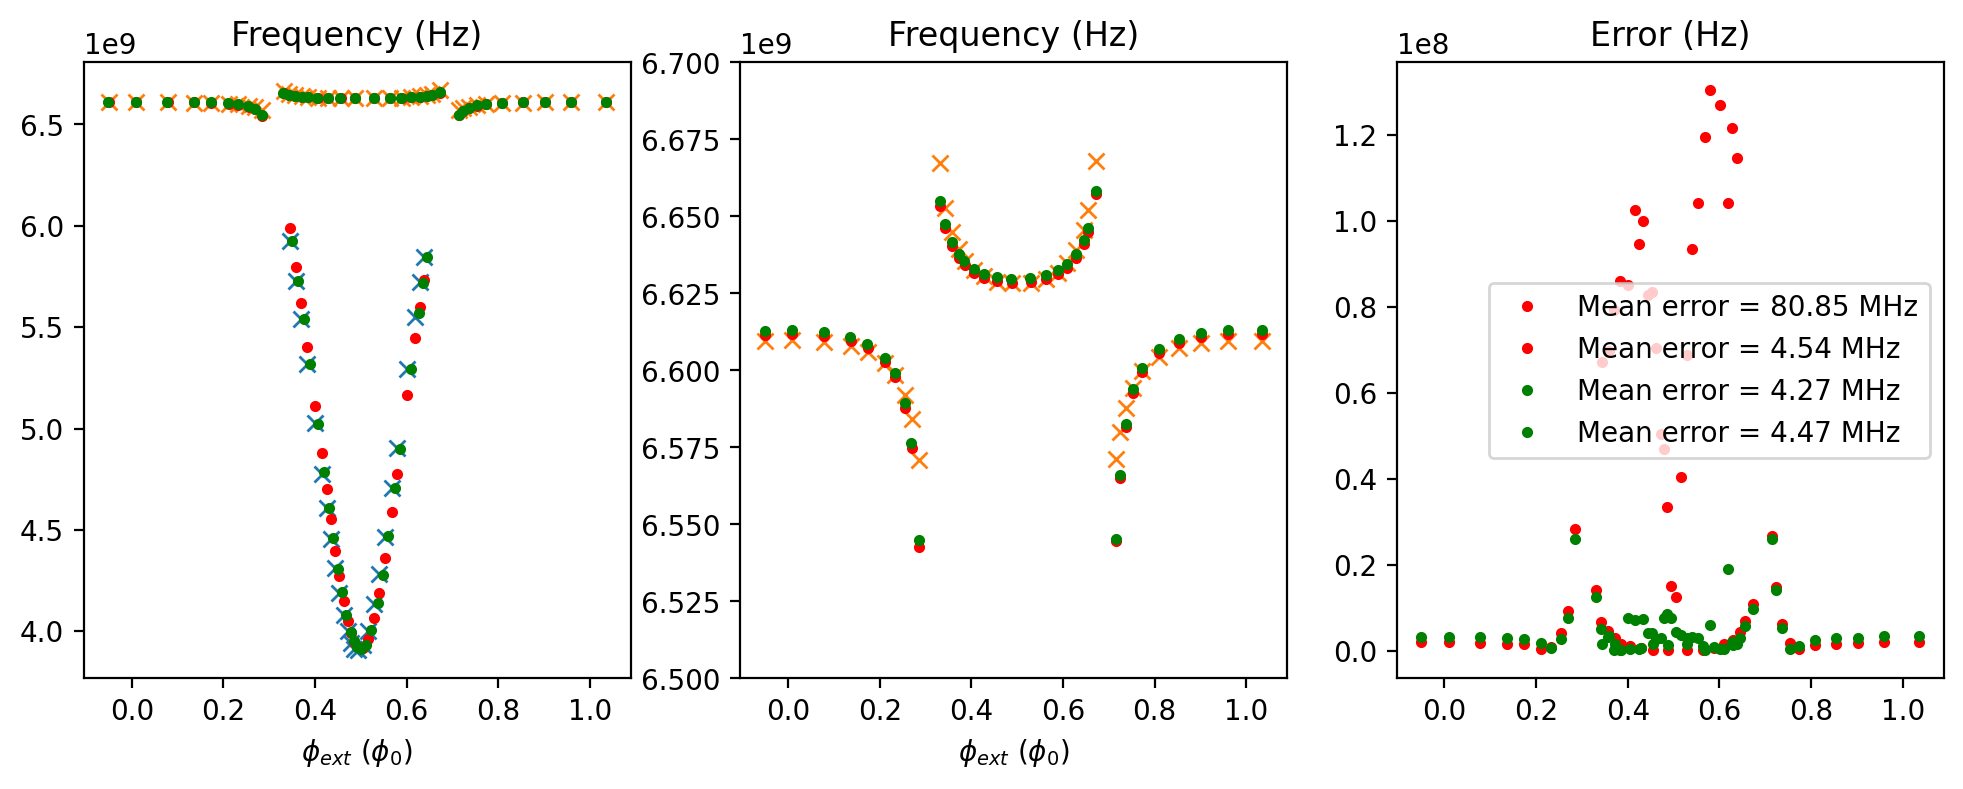

In [302]:
φ_ext_F_opt, ωF_vs_φ_ext_opt, φ_ext_R_opt, ωR_vs_φ_ext_opt = theoretical_spectrum(parameters_opt, data_set, out='spectrum')

fig, (ax1, ax2, ax3) = plt.subplots(ncols=3, figsize=[4*3,4], dpi=200)
for ax in (ax1, ax2):
    ax.plot(φ_ext_exp_F     , ω_exp_F   , 'x')
    ax.plot(φ_ext_exp_R     , ω_exp_R   , 'x')
    ax.plot(φ_ext_F_guess   , ωF_vs_φ_ext_guess , '.r')
    ax.plot(φ_ext_R_guess   , ωR_vs_φ_ext_guess , '.r')
    ax.plot(φ_ext_F_opt     , ωF_vs_φ_ext_opt   , '.g')
    ax.plot(φ_ext_R_opt     , ωR_vs_φ_ext_opt   , '.g')
    ax.set_xlabel('$\phi_{ext}$ ($\phi_0$)')

ax3.plot(φ_ext_exp_F, np.abs(ωF_vs_φ_ext_guess - ω_exp_F), 'r.', label = f'Mean error = {np.abs(ωF_vs_φ_ext_guess-ω_exp_F).mean()/1e6:.2f} MHz' )
ax3.plot(φ_ext_exp_R, np.abs(ωR_vs_φ_ext_guess - ω_exp_R), 'r.', label = f'Mean error = {np.abs(ωR_vs_φ_ext_guess-ω_exp_R).mean()/1e6:.2f} MHz'  )
ax3.plot(φ_ext_exp_F, np.abs(ωF_vs_φ_ext_opt   - ω_exp_F), 'g.', label = f'Mean error = {np.abs(ωF_vs_φ_ext_opt   - ω_exp_F).mean()/1e6:.2f} MHz' )
ax3.plot(φ_ext_exp_R, np.abs(ωR_vs_φ_ext_opt   - ω_exp_R), 'g.', label = f'Mean error = {np.abs(ωR_vs_φ_ext_opt   - ω_exp_R).mean()/1e6:.2f} MHz'  )
    
ax1.set_title('Frequency (Hz)')
ax2.set_title('Frequency (Hz)')
ax3.set_title('Error (Hz)')
ax2.set_ylim([6.5e9,6.7e9])
ax3.legend()

# Qubit 1

In [102]:
experiment_name = 'qubit_1'
load = False
method = 'Nelder-Mead'


### Load spectral data and theoretical model

In [103]:
φ_ext_exp, ω_exp, I_exp, I0, Iss = fits.get_experimental_spectrum(experiment_name)
theoretical_spectrum = fits.get_theoretical_spectrum_low_ene(experiment_name)

#Remove the part of the spectrum around phi_ext = 0
φ_ext_exp = φ_ext_exp[:22]
ω_exp = ω_exp[:22]
I_exp = I_exp[:22]

## Guess parameters and set bounds

In [106]:
ω_q, μ, _, _ = np.load(os.getcwd() + opt_dir +  'qubit_1_single_1' + '.npz')['parameters_opt']

I0_guess = I0
I_origin_guess = Iss - I0/2
# I0_guess = I0
# I_origin_guess = Iss - I0/2
parameters_guess = [ω_q, μ, I0_guess, I_origin_guess]

parameter_names = ['ω_q_1', 'μ_1', 'I0', 'I_origin']
bounds = fits.create_bounds(parameters_guess)
data_set = ([I_exp, ω_exp])

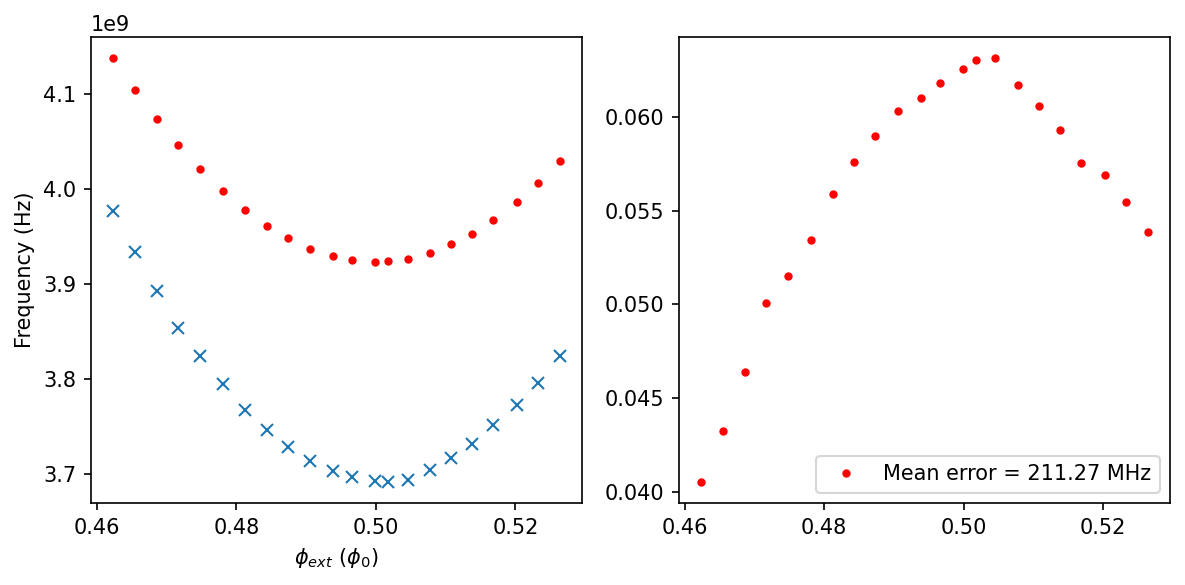

In [107]:
φ_ext_guess, ω_guess = theoretical_spectrum(parameters_guess, data_set, out='spectrum')
fig, (ax2, ax3) = plt.subplots(dpi=150, ncols=2, figsize=[4*2,4])
ax2.plot(φ_ext_guess, ω_exp, 'x')
ax2.plot(φ_ext_guess, ω_guess, 'r.')
ax2.set_ylabel('Frequency (Hz)')
ax2.set_xlabel(r'$\phi_{ext}$ ($\phi_0$)')

# ax2.set_ylim([3.5e9,4e9])
# ax2.set_xlim([0.45,0.55])

ax3.plot(φ_ext_guess, np.abs(ω_guess-ω_exp)/ω_exp, 'r.' , label = f'Mean error = {np.abs(ω_guess-ω_exp).mean()/1e6:.2f} MHz' )
ax3.legend()

fig.tight_layout()

## Optimize or load previous optimization

In [108]:
data_set_path = os.path.join(os.getcwd() + opt_dir, experiment_name + '_data_set.pkl')
parameters_path = os.getcwd() + opt_dir + experiment_name + '.npz'
if load:
    with open(data_set_path, 'rb') as f:
        data_set = pickle.load(f)
    parameters_opt, parameters_guess, bounds = fits.load_optimization_results(experiment_name)
else:
    with open(data_set_path, 'wb') as f:
        pickle.dump(data_set, f)
    parameters_opt = minimize(theoretical_spectrum, parameters_guess, data_set, bounds=bounds, method='Nelder-Mead', tol=1e-13).x
    np.savez(parameters_path, parameters_opt=parameters_opt,
             parameters_guess = np.array(parameters_guess), bounds=np.array(bounds))

4.647937618918255
8.90211503805854
4.782547715836534
7.163319989425144
5.83352342000817
0.4964876922659874
3.8362036537287914
7.165170141480898
4.673048071127215
6.372899926992712
4.07413289180623
1.785300752689941
2.4398549959325604
1.7753992469886641
2.7544299450637637
1.083013654544333
0.9125657324852786
3.2040873640877714
0.7925200421981315
1.553399480533702
0.5900988469289264
1.666153138859367
0.5765404286187225
1.3945281388010506
0.4106230720253706
0.6003985659561004
0.3676546175516791
0.6604881364964323
0.32479302363662865
0.801328221692584
0.37734215665837334
0.9450980415876589
0.27282446783930636
0.25378083023514125
0.34836265723544835
0.5057555620589986
0.29223405775158834
0.4573282599292569
0.2843066544211564
0.2662412500163021
0.2511109948468499
0.30332595531973694
0.42570094116664936
0.25288734799852514
0.21781304918531275
0.20756149467775775
0.3061271566811471
0.23797195592255782
0.22974691221781016
0.19005269870288563
0.205845301376688
0.33387408522095824
0.2164101117107

In [109]:
print('Guessed parameters \n')
[print(name + f' = {value:.3f}') for name, value in zip(parameter_names, parameters_guess)];
print('\n')
print('Optimized parameters \n')
[print(name + f' = {value:.3f}') for name, value in zip(parameter_names, parameters_opt)];

Guessed parameters 

ω_q_1 = 3923625919.414
μ_1 = 17457047360.045
I0 = 0.003
I_origin = -0.002


Optimized parameters 

ω_q_1 = 3693699450.229
μ_1 = 18964523412.906
I0 = 0.003
I_origin = -0.002


## Plot fits and errors

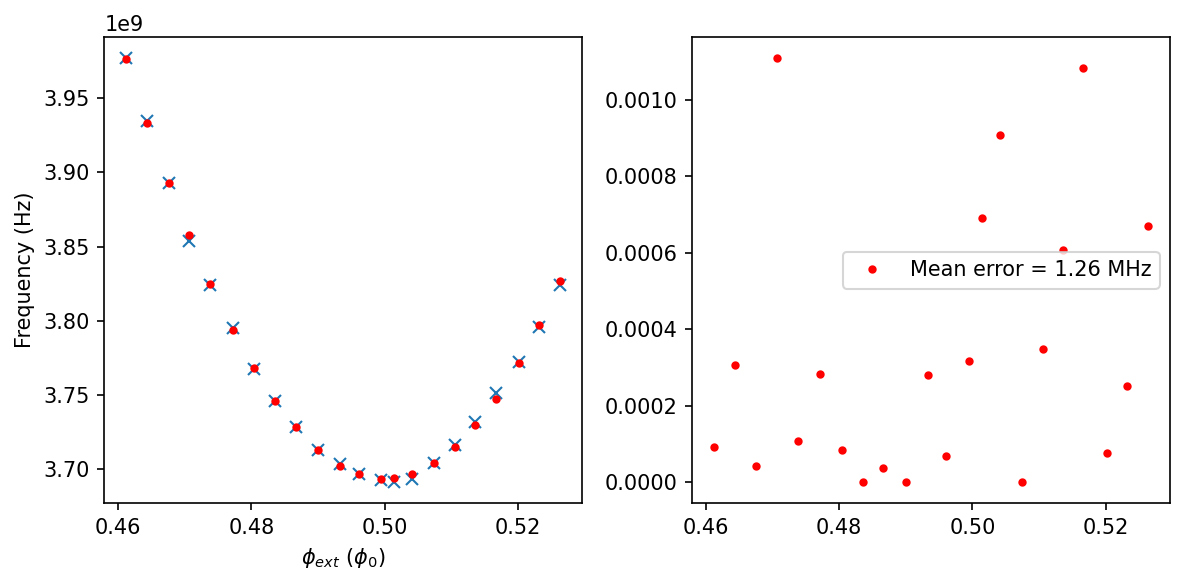

In [111]:
φ_ext_opt, ω_opt = theoretical_spectrum(parameters_opt  , data_set,  out = 'spectrum')
fig, (ax2, ax3) = plt.subplots(dpi=150, ncols=2, figsize=[4*2,4])
ax2.plot(φ_ext_opt, ω_exp, 'x')
ax2.plot(φ_ext_opt, ω_opt, 'r.')
ax2.set_ylabel('Frequency (Hz)')
ax2.set_xlabel(r'$\phi_{ext}$ ($\phi_0$)')

# ax2.set_ylim([3.5e9,4e9])
# ax2.set_xlim([0.45,0.55])

ax3.plot(φ_ext_opt, np.abs(ω_opt-ω_exp)/ω_exp, 'r.' , label = f'Mean error = {np.abs(ω_opt-ω_exp).mean()/1e6:.2f} MHz' )
ax3.legend()

fig.tight_layout()

# Resonator 1 

In [123]:
experiment_name = 'resonator_1'
method = 'Nelder-Mead'
load = False

### Load spectral data and theoretical model

In [124]:
φ_ext_exp, ω_exp, I_exp, I0, Iss = fits.get_experimental_spectrum(experiment_name)

In [125]:
theoretical_spectrum = fits.get_theoretical_spectrum_low_ene(experiment_name)

## Guess parameters and set bounds

In [152]:
ω_q, μ, _, _ = np.load(os.getcwd() + opt_dir +  'qubit_1' + '.npz')['parameters_opt']
ω_r = sq_ext.get_experimental_parameters(experiment_name,return_effective=True)[-1]
ω_r *= GHz

In [166]:
ω_q = 4481042231.372
μ   = 12080056707.076
ω_r = 6472837396.320
g_Φ = 101437592.861
g_q= -165153513.176

I0_guess = I0
I_origin_guess = Iss - I0/2

crossing_index_1  = 13
crossing_index_2  = 10
extra_important_indices = [22, 23, 24]
important_multiplier = 1

parameter_names = ['ω_q', 'μ', 'ω_r', 'g_Φ', 'g_q', 'I0_guess', 'I_origin_guess' ]
parameters_guess = [ω_q,   μ,   ω_r,  g_Φ,   g_q,   I0_guess,  I_origin_guess ]
data_set = ([I_exp, ω_exp, crossing_index_1, crossing_index_2, extra_important_indices, important_multiplier])
bounds = fits.create_bounds(parameters_guess, flexible_param_indices=[3,4])

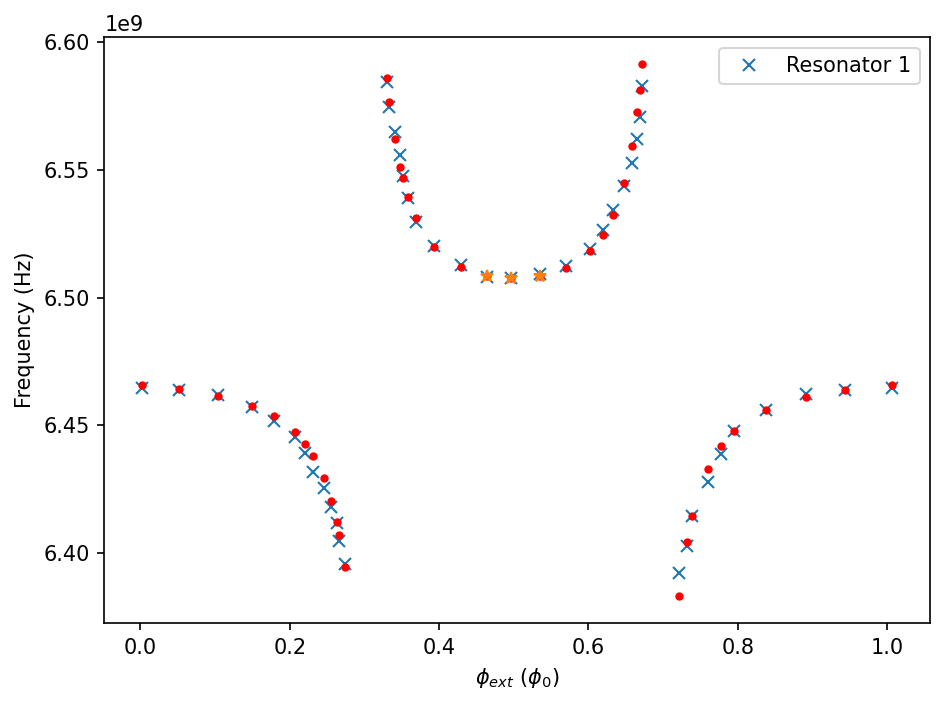

In [167]:
φ_ext_guess, ω_guess = theoretical_spectrum(parameters_guess, data_set, out='spectrum')

fig, ax = plt.subplots(dpi=150)
ax.plot(φ_ext_exp, ω_exp, marker='x', ls='', label='Resonator 1')
ax.plot(φ_ext_guess, ω_guess, '.r')
ax.plot(φ_ext_guess[extra_important_indices], ω_guess[extra_important_indices], '*')

ax.set_ylabel('Frequency (Hz)')
ax.set_xlabel('$\phi_{ext}$ ($\phi_0$)')
ax.legend()
fig.tight_layout()

## Optimize or load previous optimization

In [168]:
if load:
    parameters_opt, parameters_guess, bounds = fits.load_optimization_results(experiment_name)
else:
    parameters_opt = minimize(theoretical_spectrum, parameters_guess, data_set, bounds=bounds, method = method).x
    np.savez(os.getcwd() + opt_dir + experiment_name + '.npz', parameters_opt=parameters_opt,
             parameters_guess = np.array(parameters_guess), bounds=np.array(bounds))

0.10549099770349217
0.5248703247822981
0.4322243875344467
13.533217004831455
0.12034379456681348
0.1694471724343729
1.1135744093155309
1.2266875797171555
12.908670817056187
6.489112927109348
6.8179608015707664
3.202975931976653
3.4612234670765627
1.5462841572854433
1.7871424621349001
0.7157104004365101
1.783495644185114
0.47417546457239057
2.101357280997803
0.4575037802417917
1.0016940845241364
0.3484169960104866
0.36716989003249645
0.5898679050651102
0.22881047719908906
0.6367155704122677
0.21571042674305724
0.6098058560731382
0.20565088051928423
0.4610775511563072
0.19747345178510953
0.3407399337943964
0.1920258046572685
0.24452894304592132
0.1374262124775877
0.2974791446446533
0.12213493633756828
0.16413009788474847
0.291700407223979
0.1257997351241703
0.20777436041239833
0.12763651794311331
0.12719307410196973
0.19097964267240905
0.11620115244346618
0.11983270930535507
0.13188740003831959
0.10231365002903843
0.15546628404269505
0.10196114736571121
0.14107678383846664
0.101272821614

In [169]:
print('Guessed parameters \n')
[print(name + f' = {value:.3f}') for name, value in zip(parameter_names, parameters_guess)];
error_guess = theoretical_spectrum(parameters_guess, data_set, out='error');
print(f'Error = {error_guess}')
print('\n')
print('Optimized parameters \n')
[print(name + f' = {value:.3f}') for name, value in zip(parameter_names, parameters_opt)];
error_opt = theoretical_spectrum(parameters_opt, data_set, out='error');
print(f'Error = {error_opt}')

Guessed parameters 

ω_q = 4481042231.372
μ = 12080056707.076
ω_r = 6472837396.320
g_Φ = 101437592.861
g_qI0_guess = -165153513.176
I_origin_guess = 0.003
0.10549099770349217
Error = 0.10549099770349217


Optimized parameters 

ω_q = 4704940183.695
μ = 11104205903.012
ω_r = 6470458175.454
g_Φ = 135917251.143
g_qI0_guess = -125789522.334
I_origin_guess = 0.003
0.0867773997626381
Error = 0.0867773997626381


## Plot fits and errors

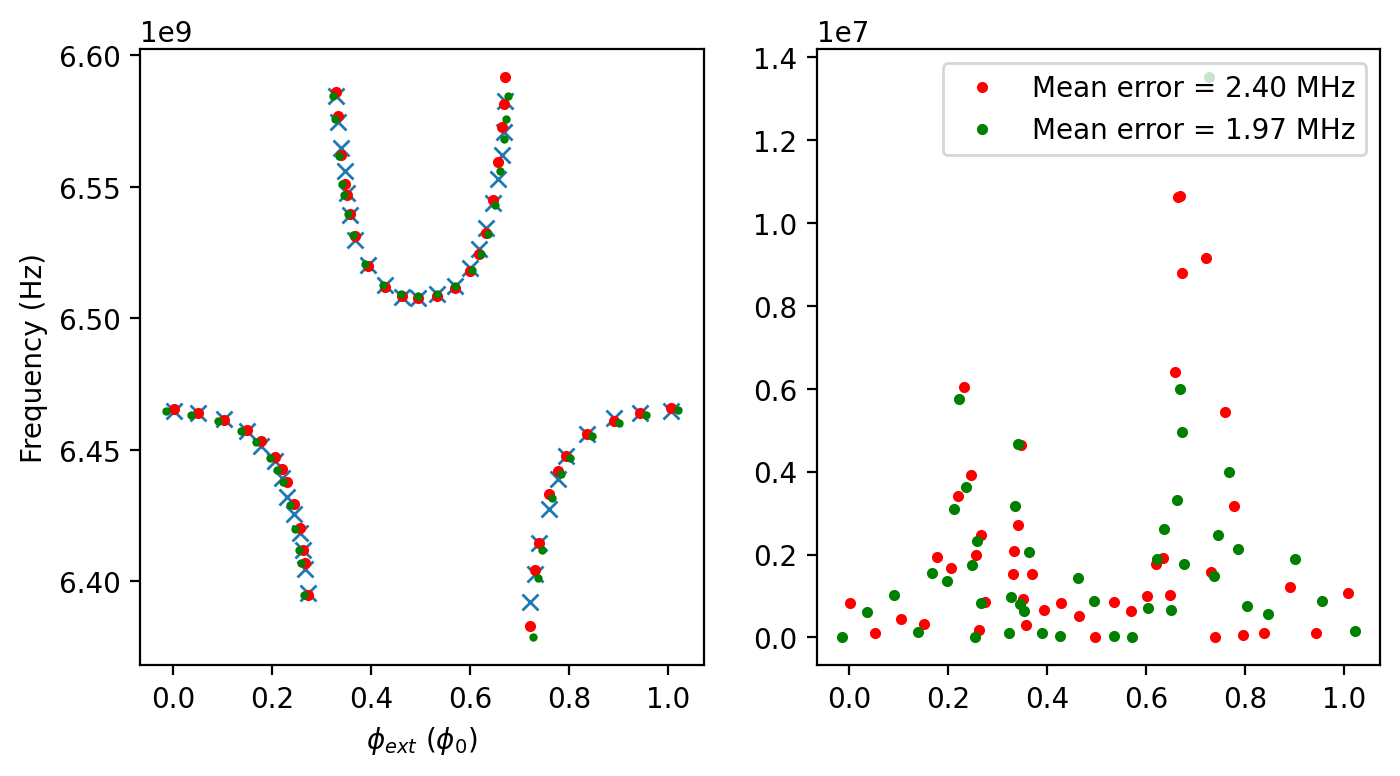

In [170]:
φ_ext_opt , ω_opt = theoretical_spectrum(parameters_opt, data_set, out='spectrum')

fig, (ax1, ax2 )= plt.subplots(ncols=2, dpi=200, figsize=[8,4])
ax1.plot(φ_ext_exp, ω_exp, marker='x', ls='', label='Resonator 1')
ax1.plot(φ_ext_guess, ω_guess, '.r')
ax1.plot(φ_ext_opt, ω_opt, 'g.', markersize=4)
ax1.set_ylabel('Frequency (Hz)')
ax1.set_xlabel('$\phi_{ext}$ ($\phi_0$)')

ax2.plot(φ_ext_guess, np.abs(ω_guess - ω_exp), 'r.' , label = f'Mean error = {np.abs(ω_guess-ω_exp).mean()/1e6:.2f} MHz' )
ax2.plot(φ_ext_opt, np.abs(ω_opt   - ω_exp), 'g.'   , label = f'Mean error = {np.abs(ω_opt-ω_exp).mean()/1e6:.2f} MHz'  )
ax2.legend()

# Qubit 1 and Resonator 1

In [352]:
experiment_name = 'resonator_and_qubit_1'


### Load spectral data and theoretical model

In [353]:
φ_ext_exp_F, ω_exp_F, I_exp_F, I0_F, Iss_F = fits.get_experimental_spectrum('qubit_1')
φ_ext_exp_R, ω_exp_R, I_exp_R, I0_R, Iss_R = fits.get_experimental_spectrum('resonator_1')

In [354]:
theoretical_spectrum = fits.get_theoretical_spectrum(experiment_name)

### Guess parameters and set bounds

In [355]:
CF_1, LF_1, EJ_1, I0_F_1, I_origin_F_1= np.load(os.getcwd() + opt_dir +  'qubit_1' + '.npz')['parameters_opt']
C_int_11, CR_1, LR_1, I0_R_1, I_origin_R_1 = np.load(os.getcwd() + opt_dir +  'resonator_1' + '.npz')['parameters_opt']

crossing_index_1_F = 22
crossing_index_1_R = 13
crossing_index_2_R = 10
nmax_r = 5
nmax_f = 15
# C_int = 500

data_set = ([I_exp_F, ω_exp_F, I_exp_R, ω_exp_R, Δ_1, crossing_index_1_F, crossing_index_1_R, crossing_index_2_R, nmax_r, nmax_f])
parameters_guess = [CF_1, LF_1, EJ_1, I0_F_1, I_origin_F_1, C_int_11, CR_1, LR_1, I0_R_1, I_origin_R_1]

parameter_names = ['CF_1', 'LF_1', 'EJ_1', 'I0_F_1', 'I_origin_F_1',
                   'C_int_11', 'CR_1', 'LR_1', 'I0_R_1', 'I_origin_R_1']

bounds = fits.create_bounds(parameters_guess)

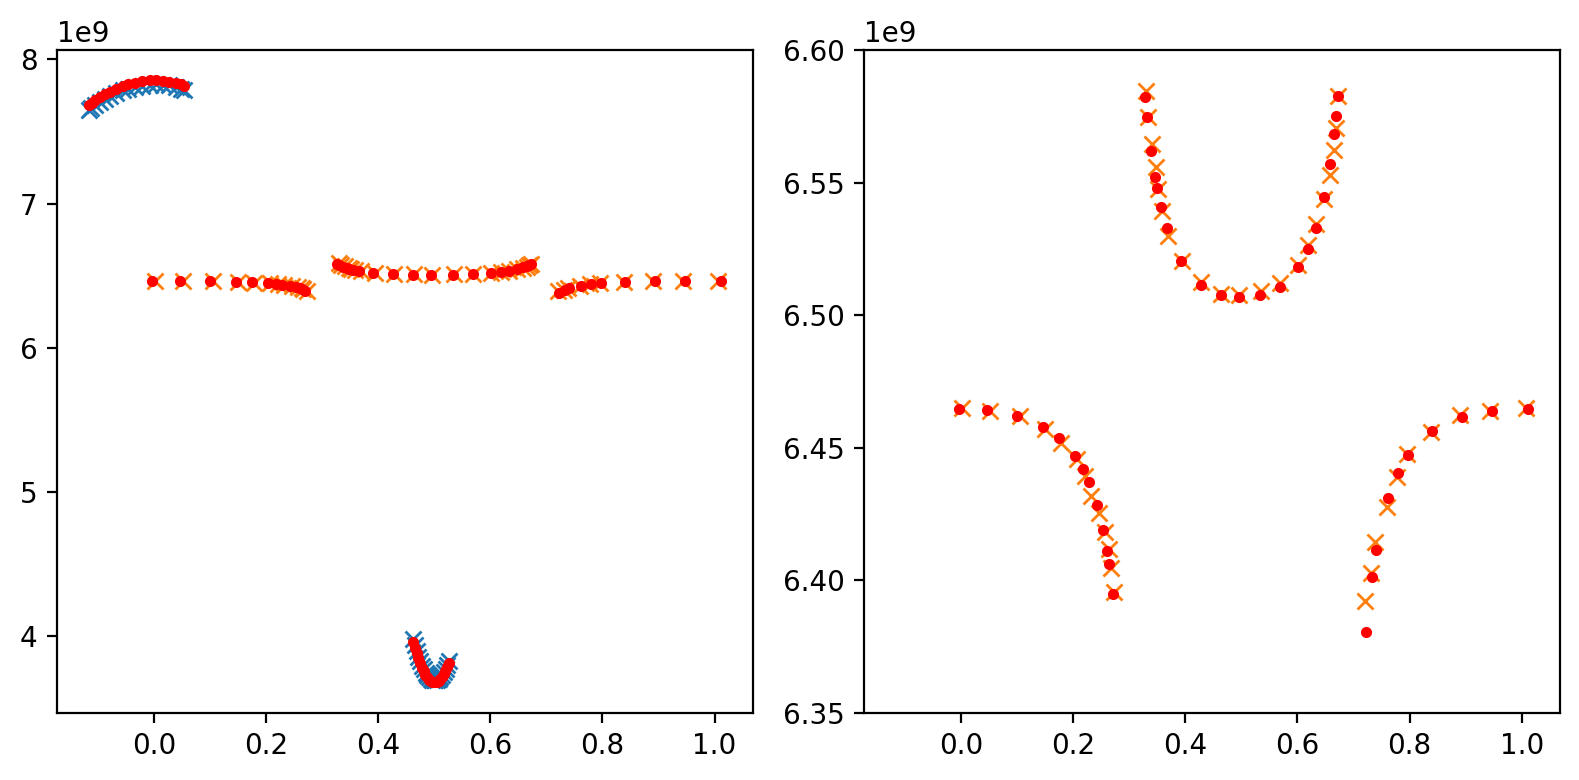

In [356]:
φ_ext_F_guess, ωF_vs_φ_ext_guess, φ_ext_R_guess, ωR_vs_φ_ext_guess = theoretical_spectrum(parameters_guess, data_set, out='spectrum')

fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=[8,4], dpi=200)
for ax in (ax1, ax2):
    ax.plot(φ_ext_exp_F, ω_exp_F, 'x')
    ax.plot(φ_ext_exp_R, ω_exp_R, 'x')
    ax.plot(φ_ext_F_guess, ωF_vs_φ_ext_guess, '.r')
    ax.plot(φ_ext_R_guess, ωR_vs_φ_ext_guess, '.r')
    
ax2.set_ylim([6.35e9,6.6e9])
fig.tight_layout()

### Optimize or load previous optimization

In [357]:
data_set_path = os.path.join(os.getcwd() + opt_dir, experiment_name + '_data_set.pkl')
parameters_path = os.getcwd() + opt_dir + experiment_name + '.npz'
if load:
    with open(data_set_path, 'rb') as f:
        data_set = pickle.load(f)
    parameters_opt, parameters_guess, bounds = fits.load_optimization_results(experiment_name)
else:
    with open(data_set_path, 'wb') as f:
        pickle.dump(data_set, f)
    parameters_opt = minimize(theoretical_spectrum, parameters_guess, data_set, bounds=bounds, method=method).x
    np.savez(parameters_path, parameters_opt=parameters_opt,
             parameters_guess = np.array(parameters_guess), bounds=np.array(bounds))

0.9193895617886891
0.9193895524562476
0.9193895855584366
0.9193897746949315
0.9193037837156615
0.919092132627791
0.9193895617641799
0.919389561629882
0.9193895616079617
0.9193853826624991
0.9193911190928628
51.52018733215044
7.247154824189225
1.453180849856751
0.8471104367928781
0.847110406082487
0.847110419191818
0.8471105350639831
0.8474176100962962
0.847648224381822
0.8471104367756008
0.8471105182727072
0.8471104443229085
0.8471076262488526
0.8470873319601369
53.285215349622746
4.858223962645972
1.1723350941729787
0.8602170482497216
0.8394613843160048
0.8394613494086842
0.8394613608363586
0.8394614736285684
0.8397850968710254
0.8400323647872927
0.8394613843073069
0.8394613050509059
0.8394613768417218
0.8394705958110125
0.8394791966736022
16.847871656171996
1.4419256949213777
0.7401398607060079
0.7401398153193335
0.7401398147368261
0.740139881262599
0.7404672416548594
0.7407094536106023
0.7401398606899217
0.7401398800927379
0.740139862433975
0.7401550726720849
0.7401602333008097
56.8

In [358]:
print('Guessed parameters \n')
[print(name + f' = {value:.3f}') for name, value in zip(parameter_names, parameters_guess)];
print('\n')
print('Optimized parameters \n')
[print(name + f' = {value:.3f}') for name, value in zip(parameter_names, parameters_opt)];

Guessed parameters 

CF_1 = 28.111
LF_1 = 25.356
EJ_1 = 5.582
I0_F_1 = 0.003
I_origin_F_1 = -0.002
C_int_11 = 500.000
CR_1 = 7.500
LR_1 = 80.120
I0_R_1 = 0.003
I_origin_R_1 = -0.002


Optimized parameters 

CF_1 = 28.212
LF_1 = 25.352
EJ_1 = 5.531
I0_F_1 = 0.003
I_origin_F_1 = -0.002
C_int_11 = 500.002
CR_1 = 7.498
LR_1 = 80.134
I0_R_1 = 0.003
I_origin_R_1 = -0.002


### Plot fits and errors

(6350000000.0, 6600000000.0)

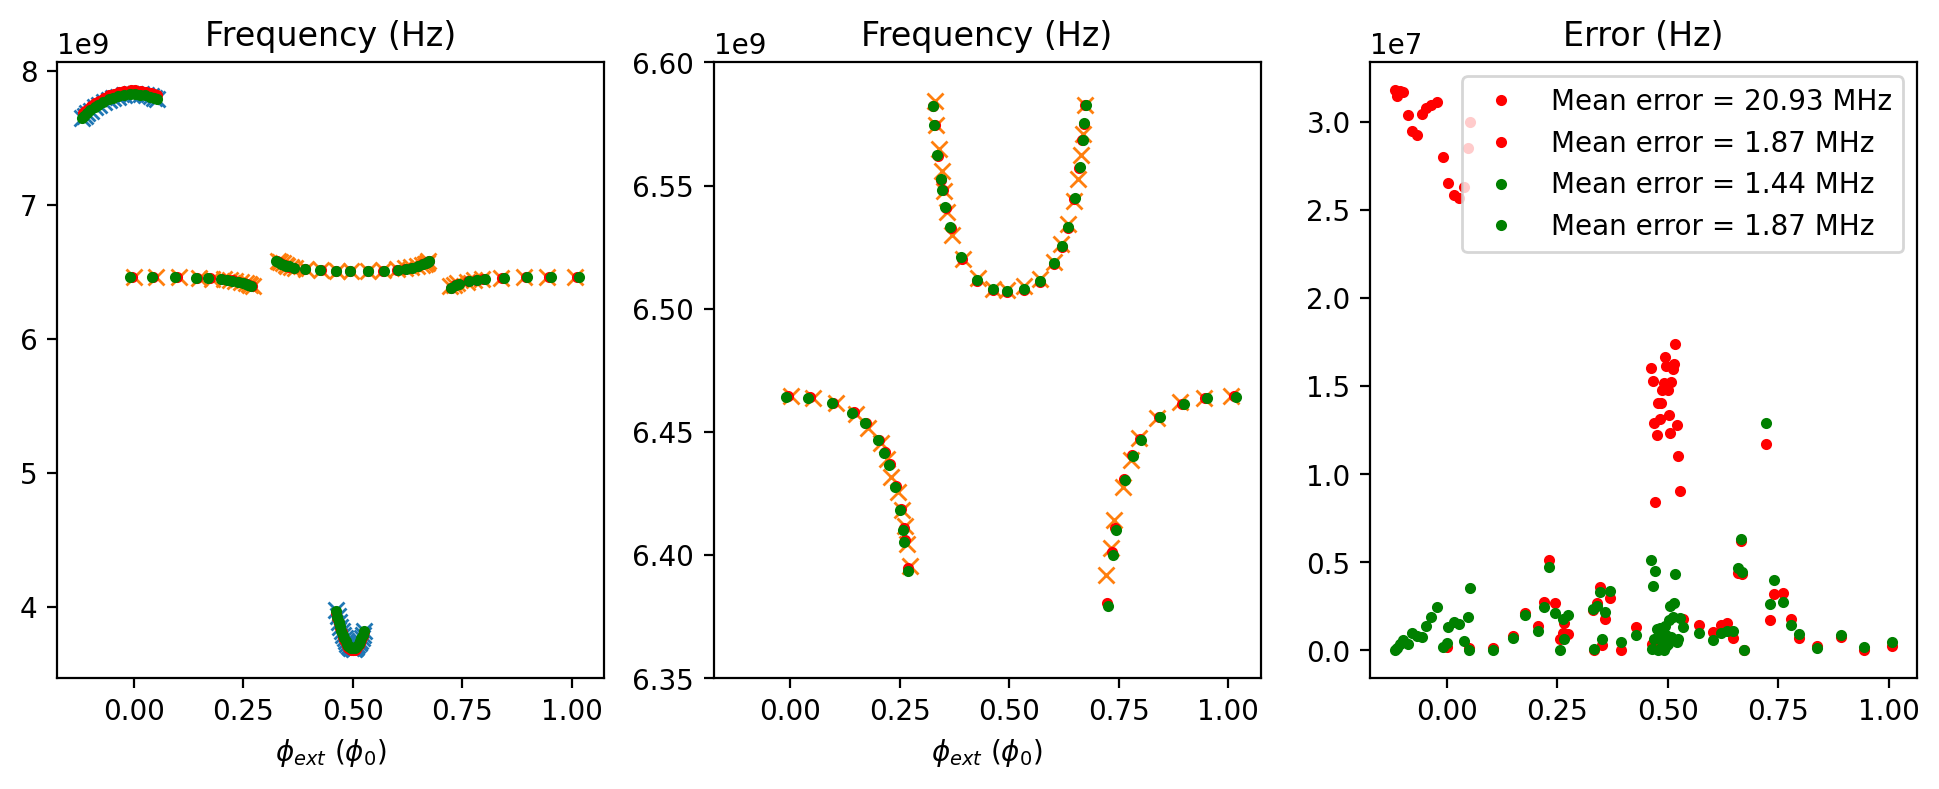

In [359]:
φ_ext_F_opt, ωF_vs_φ_ext_opt, φ_ext_R_opt, ωR_vs_φ_ext_opt = theoretical_spectrum(parameters_opt, data_set, out='spectrum')

fig, (ax1, ax2, ax3) = plt.subplots(ncols=3, figsize=[4*3,4], dpi=200)
for ax in (ax1, ax2):
    ax.plot(φ_ext_exp_F     , ω_exp_F   , 'x')
    ax.plot(φ_ext_exp_R     , ω_exp_R   , 'x')
    ax.plot(φ_ext_F_guess   , ωF_vs_φ_ext_guess , '.r')
    ax.plot(φ_ext_R_guess   , ωR_vs_φ_ext_guess , '.r')
    ax.plot(φ_ext_F_opt     , ωF_vs_φ_ext_opt   , '.g')
    ax.plot(φ_ext_R_opt     , ωR_vs_φ_ext_opt   , '.g')
    ax.set_xlabel('$\phi_{ext}$ ($\phi_0$)')

ax3.plot(φ_ext_exp_F, np.abs(ωF_vs_φ_ext_guess - ω_exp_F), 'r.', label = f'Mean error = {np.abs(ωF_vs_φ_ext_guess-ω_exp_F).mean()/1e6:.2f} MHz' )
ax3.plot(φ_ext_exp_R, np.abs(ωR_vs_φ_ext_guess - ω_exp_R), 'r.', label = f'Mean error = {np.abs(ωR_vs_φ_ext_guess-ω_exp_R).mean()/1e6:.2f} MHz'  )
ax3.plot(φ_ext_exp_F, np.abs(ωF_vs_φ_ext_opt   - ω_exp_F), 'g.', label = f'Mean error = {np.abs(ωF_vs_φ_ext_opt   - ω_exp_F).mean()/1e6:.2f} MHz' )
ax3.plot(φ_ext_exp_R, np.abs(ωR_vs_φ_ext_opt   - ω_exp_R), 'g.', label = f'Mean error = {np.abs(ωR_vs_φ_ext_opt   - ω_exp_R).mean()/1e6:.2f} MHz'  )
ax3.legend()
ax1.set_title('Frequency (Hz)')
ax2.set_title('Frequency (Hz)')
ax3.set_title('Error (Hz)')
ax2.set_ylim([6.35e9,6.6e9])


# Qubit 2

In [198]:
experiment_name = 'qubit_2'
load = False


### Load spectral data and theoretical model

In [199]:
φ_ext_exp, ω_exp, I_exp, I0, Iss = fits.get_experimental_spectrum(experiment_name)

#Remove the part of the spectrum around phi_ext = 0
φ_ext_exp = φ_ext_exp[:20]
ω_exp = ω_exp[:20]
I_exp = I_exp[:20]

In [200]:
theoretical_spectrum = fits.get_theoretical_spectrum_low_ene(experiment_name)

## Guess parameters and set bounds

In [201]:
ω_q = 3.45 * GHz
μ = 35 * GHz

I0_guess = I0
I_origin_guess = Iss - I0/2
parameters_guess = [ω_q, μ, I0_guess, I_origin_guess]
parameter_names = ['ω_q_2', 'μ_2', 'I0', 'I_origin']
bounds = fits.create_bounds(parameters_guess)
data_set = ([I_exp, ω_exp])

(0.45, 0.55)

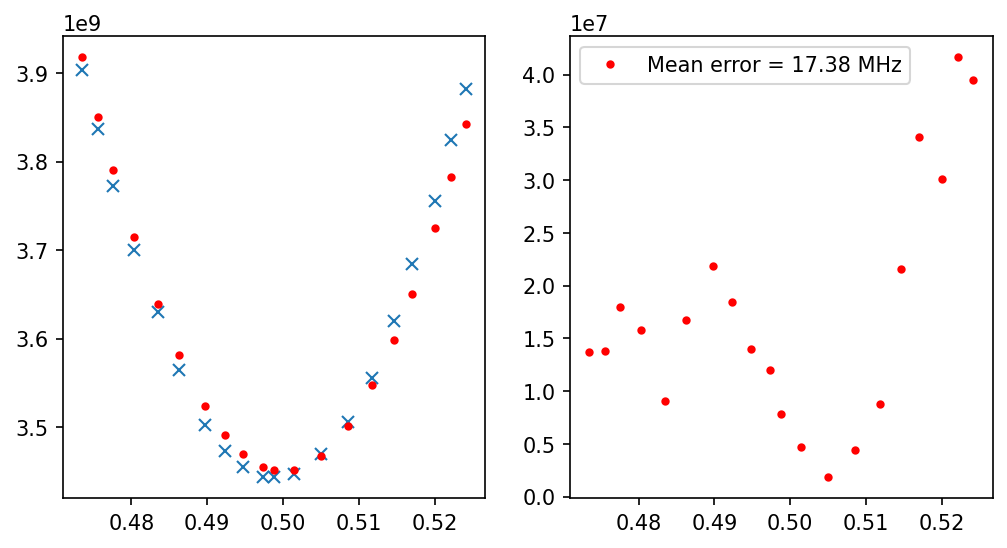

In [207]:
φ_ext_guess, ω_guess = theoretical_spectrum(parameters_guess, data_set, out='spectrum')
fig, (ax1, ax2) = plt.subplots(dpi=150, ncols = 2, figsize=[8,4])
ax1.plot(φ_ext_guess, ω_exp, 'x')
ax1.plot(φ_ext_guess, ω_guess, 'r.')

ax.set_ylabel('Frequency (Hz)')
ax.set_xlabel(r'$\phi_{ext}$ ($\phi_0$)')

ax2.plot(φ_ext_guess, np.abs(ω_guess   - ω_exp), 'r.'   , label = f'Mean error = {np.abs(ω_guess-ω_exp).mean()/1e6:.2f} MHz'  )
ax2.legend()
ax.set_ylim([3.4e9,4e9])
ax.set_xlim([0.45,0.55])

## Optimize or load previous optimization

In [203]:
data_set_path = os.path.join(os.getcwd() + opt_dir, experiment_name + '_data_set.pkl')
parameters_path = os.getcwd() + opt_dir + experiment_name + '.npz'
if load:
    with open(data_set_path, 'rb') as f:
        data_set = pickle.load(f)
    parameters_opt, parameters_guess, bounds = fits.load_optimization_results(experiment_name)
else:
    with open(data_set_path, 'wb') as f:
        pickle.dump(data_set, f)
    parameters_opt = minimize(theoretical_spectrum, parameters_guess, data_set, bounds=bounds, method='Nelder-Mead').x
    np.savez(parameters_path, parameters_opt=parameters_opt,
             parameters_guess = np.array(parameters_guess), bounds=np.array(bounds))

0.3475535832699475
3.2819570756718077
0.39168619503405955
9.99617875600816
24.459225359335438
40.38088736339292
8.028832235328975
18.608380389875553
4.082203328215526
12.313344042147108
3.2364132021851164
6.020026736782178
1.9107556668679553
2.4216838738947404
4.125969978086828
1.3494100032946215
3.1614656960226544
1.0926248045258111
2.4017858845026234
0.8297602881137524
2.0000186083077116
0.520336578466969
1.4066940995249209
0.4815122286726985
0.7729360711785122
0.370559227993443
0.7322382323518238
0.21457327141951657
0.484813565017108
0.24009938366645384
0.5636359182709174
0.16169583712058783
0.49419068058174037
0.17179459471920394
0.4968836207425957
0.15565012514074184
0.16254559419149447
0.29451165668583634
0.10984977785488272
0.29544626545783187
0.08400760407175255
0.1842091318519063
0.09625030390094995
0.16807714199273252
0.0981490276624813
0.18774970421329354
0.09069674190390205
0.1537667055265112
0.07876964557964611
0.11773117668638897
0.06989299400055361
0.10909864980440187
0.

In [204]:
print('Guessed parameters \n')
[print(name + f' = {value:.3f}') for name, value in zip(parameter_names, parameters_guess)];
print('\n')
print('Optimized parameters \n')
[print(name + f' = {value:.3f}') for name, value in zip(parameter_names, parameters_opt)];

Guessed parameters 

ω_q_2 = 3450000000.000
μ_2 = 35000000000.000
I0 = 0.005
I_origin = -0.005


Optimized parameters 

ω_q_2 = 3442906502.431
μ_2 = 35937439106.831
I0 = 0.005
I_origin = -0.005


## Plot fits and errors

(0.45, 0.55)

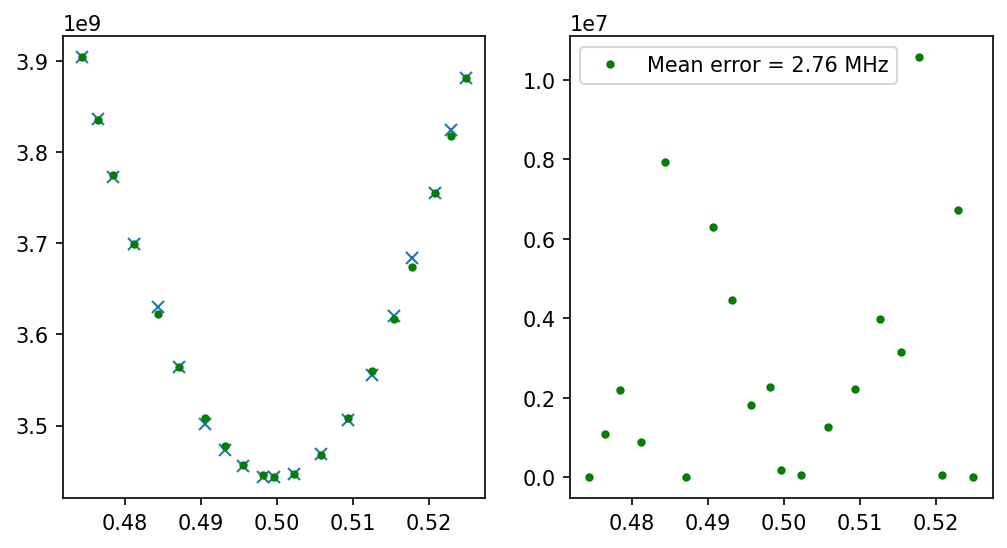

In [206]:
φ_ext_opt, ω_opt = theoretical_spectrum(parameters_opt  , data_set,  out = 'spectrum')
fig, (ax1, ax2) = plt.subplots(dpi=150, ncols = 2, figsize=[8,4])
ax1.plot(φ_ext_opt, ω_exp, 'x')
ax1.plot(φ_ext_opt, ω_opt, 'g.')

ax.set_ylabel('Frequency (Hz)')
ax.set_xlabel(r'$\phi_{ext}$ ($\phi_0$)')

ax2.plot(φ_ext_opt, np.abs(ω_opt   - ω_exp), 'g.'   , label = f'Mean error = {np.abs(ω_opt-ω_exp).mean()/1e6:.2f} MHz'  )
ax2.legend()
ax.set_ylim([3.4e9,4e9])
ax.set_xlim([0.45,0.55])

# Resonator 2

In [106]:
experiment_name = 'resonator_2'

## Load spectral data and theoretical model

In [107]:
φ_ext_exp, ω_exp, I_exp, I0, Iss = fits.get_experimental_spectrum(experiment_name)

In [108]:
theoretical_spectrum = fits.get_theoretical_spectrum_low_ene(experiment_name)

## Guess parameters and set bounds

In [109]:
ω_q = 2203615237.814
μ = 35529670364.808
ω_r = 6273261008.530
g_Φ = 128007201.473

I0_guess = I0
I_origin_guess = Iss - I0/2
crossing_index_1  = 11
crossing_index_2  = 9
extra_important_indices = [17, 18, 19]
important_multiplier = 1

parameter_names = ['ω_q', 'μ', 'ω_r', 'g_Φ', 'I0_guess', 'I_origin_guess' ]
parameters_guess = [ω_q,   μ,   ω_r,  g_Φ,   I0_guess,  I_origin_guess ]
data_set = ([I_exp, ω_exp, crossing_index_1, crossing_index_2, extra_important_indices, important_multiplier])
bounds = fits.create_bounds(parameters_guess)

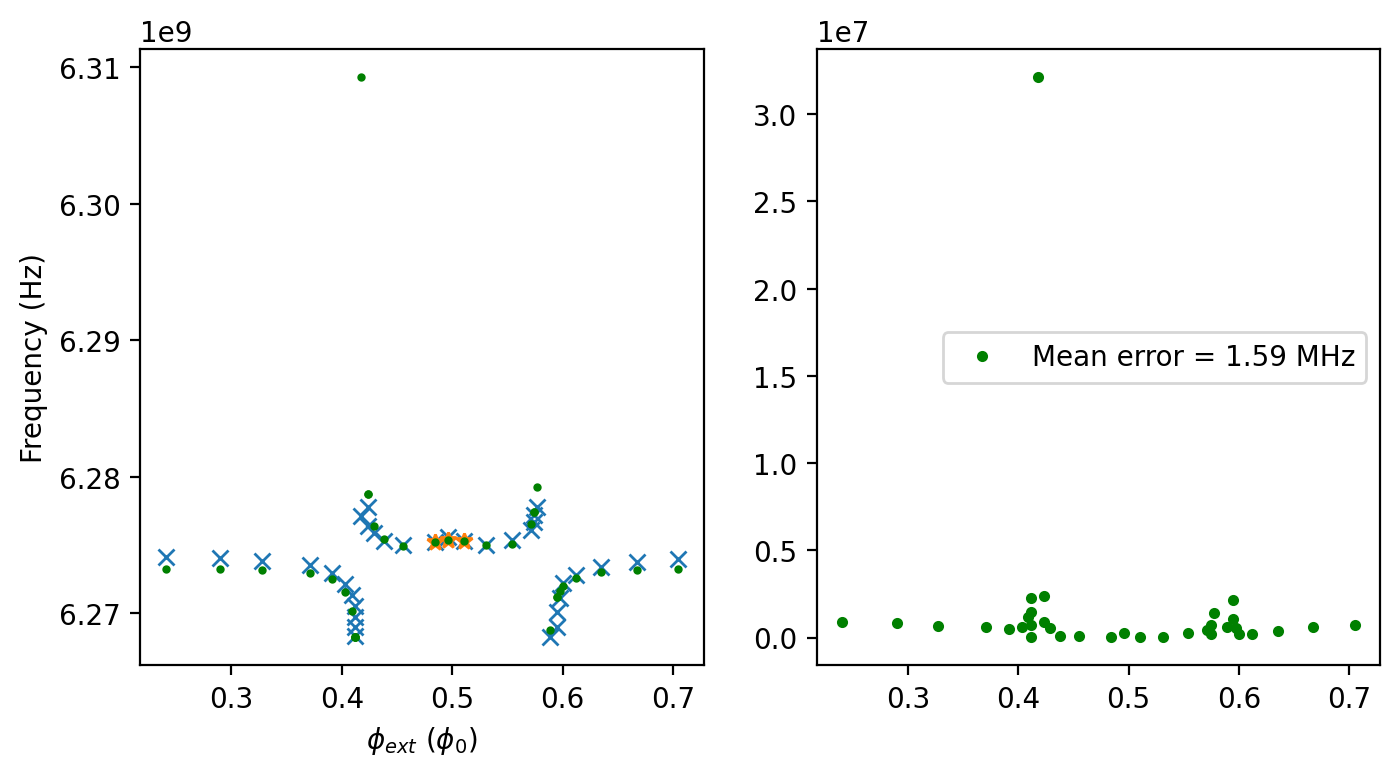

In [110]:
φ_ext_guess, ω_guess = theoretical_spectrum(parameters_guess, data_set, out='spectrum')

fig, (ax1, ax2 )= plt.subplots(ncols=2, dpi=200, figsize=[8,4])
ax1.plot(φ_ext_guess, ω_exp, marker='x', ls='', label='Resonator 1')
ax1.plot(φ_ext_guess[extra_important_indices], ω_guess[extra_important_indices], '*')
ax1.plot(φ_ext_guess, ω_guess, 'g.', markersize=4)
ax1.set_ylabel('Frequency (Hz)')
ax1.set_xlabel('$\phi_{ext}$ ($\phi_0$)')

ax2.plot(φ_ext_guess, np.abs(ω_guess   - ω_exp), 'g.'   , label = f'Mean error = {np.abs(ω_guess-ω_exp).mean()/1e6:.2f} MHz'  )
ax2.legend()

## Optimize or load previous optimization

In [111]:
if load:
    parameters_opt, parameters_guess, bounds = fits.load_optimization_results(experiment_name)
else:
    parameters_opt = minimize(theoretical_spectrum, parameters_guess, data_set, bounds=bounds, method = method).x
    np.savez(os.getcwd() + opt_dir + experiment_name + '.npz', parameters_opt=parameters_opt,
             parameters_guess = np.array(parameters_guess), bounds=np.array(bounds))

0.043808943821059224
0.06853059272799587
0.28236694460659406
7.8146444241198605
0.047837292582757
5.0398021600234335
0.12106141294535827
7.98201884267478
3.928785107303501
5.093026505868542
1.575659017254429
3.8772476312107513
2.006393778061387
2.066525322085475
1.0713281292805108
1.4979298386122255
0.5113834076421814
0.8102543587789364
0.380772699507864
0.7929944471114044
0.1740156367080164
0.5560209033901262
0.19967971335372925
0.024408212247011184
0.10601830580525494
0.23217347034735583
0.09603330925026513
0.23192258043575859
0.09411172890996837
0.029986784348234177
0.10461350278524303
0.04721144828333855
0.08812886135856819
0.052946588415566445
0.02601123231257534
0.0422897057925415
0.020677851234950067
0.028481042816809653
0.04358613881695175
0.049042404316592215
0.024343852856626512
0.040384776864803316
0.046126916537522315
0.027410391826459886
0.03892506098477459
0.026900453589694024
0.020341320910461425
0.05114127796999645
0.021882160885020256
0.026671198907779695
0.02047136749

In [112]:
print('Guessed parameters \n')
[print(name + f' = {value:.3f}') for name, value in zip(parameter_names, parameters_guess)];
print('\n')
print('Optimized parameters \n')
[print(name + f' = {value:.3f}') for name, value in zip(parameter_names, parameters_opt)];

Guessed parameters 

ω_q = 2203615237.814
μ = 35529670364.808
ω_r = 6273261008.530
g_Φ = 128007201.473
I0_guess = 0.005
I_origin_guess = 0.000


Optimized parameters 

ω_q = 1853181347.469
μ = 34743583379.767
ω_r = 6273863644.238
g_Φ = 126635783.090
I0_guess = 0.005
I_origin_guess = 0.000


## Plot fits and errors

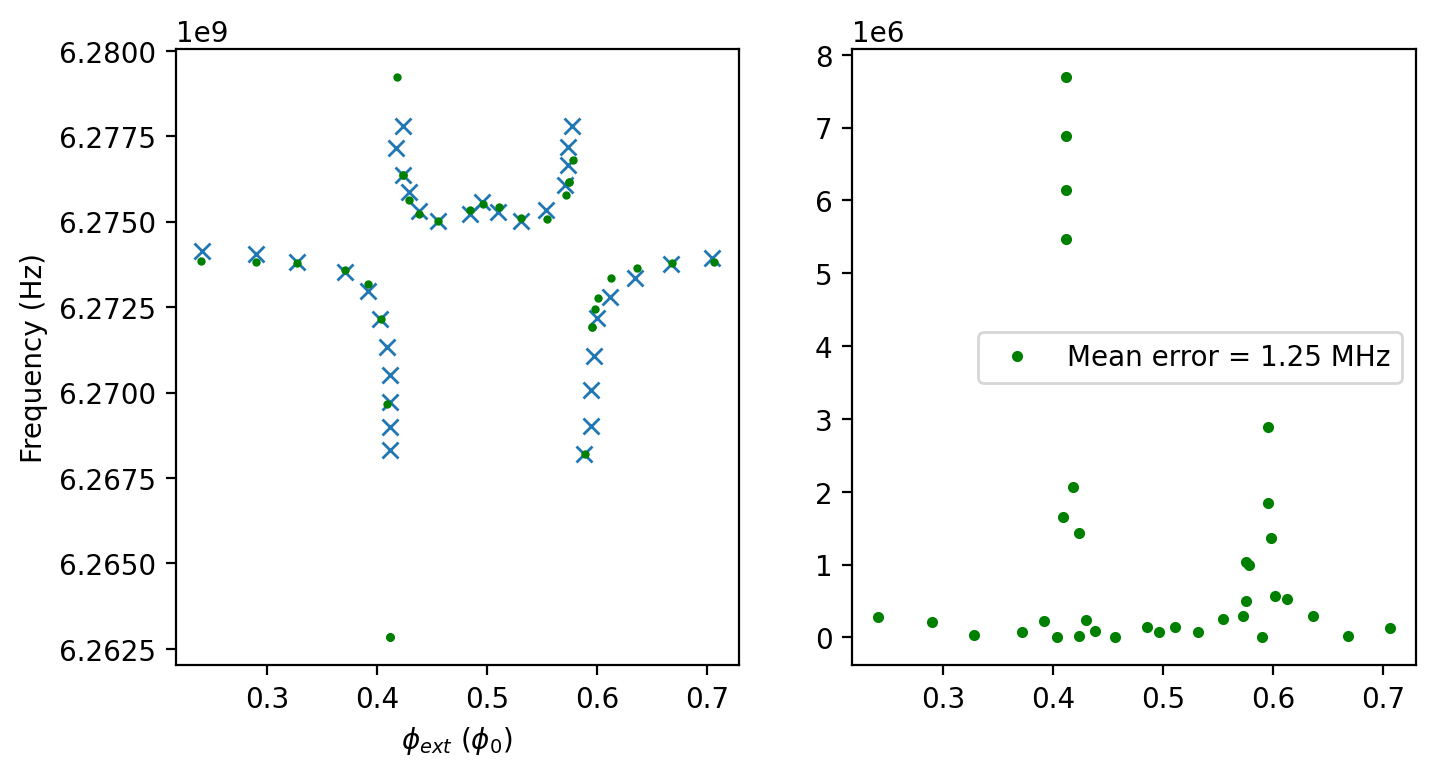

In [113]:
φ_ext_opt , ω_opt = theoretical_spectrum(parameters_opt, data_set, out='spectrum')

fig, (ax1, ax2 )= plt.subplots(ncols=2, dpi=200, figsize=[8,4])
ax1.plot(φ_ext_exp, ω_exp, marker='x', ls='', label='Resonator 1')
ax1.plot(φ_ext_opt, ω_opt, 'g.', markersize=4)
ax1.set_ylabel('Frequency (Hz)')
ax1.set_xlabel('$\phi_{ext}$ ($\phi_0$)')

ax2.plot(φ_ext_opt, np.abs(ω_opt   - ω_exp), 'g.'   , label = f'Mean error = {np.abs(ω_opt-ω_exp).mean()/1e6:.2f} MHz'  )
ax2.legend()

# Qubit 2 and Resonator 2

In [386]:
experiment_name = 'resonator_and_qubit_2'


### Load spectral data and theoretical model

In [387]:
φ_ext_exp_F, ω_exp_F, I_exp_F, I0_F, Iss_F = fits.get_experimental_spectrum('qubit_2')
φ_ext_exp_R, ω_exp_R, I_exp_R, I0_R, Iss_R = fits.get_experimental_spectrum('resonator_2')

In [388]:
theoretical_spectrum = fits.get_theoretical_spectrum(experiment_name)

### Guess parameters and set bounds

In [389]:
CF_2, LF_2, EJ_2, I0_F_2, I_origin_F_2= np.load(os.getcwd() + opt_dir +  'qubit_2' + '.npz')['parameters_opt']
CR_2, LR_2, Δ_2, I0_R_2, I_origin_R_2 = np.load(os.getcwd() + opt_dir +  'resonator_2' + '.npz')['parameters_opt']

crossing_index_1_F = 20
crossing_index_1_R = 11
crossing_index_2_R = 9
nmax_r = 5
nmax_f = 15

data_set = ([I_exp_F, ω_exp_F, I_exp_R, ω_exp_R, crossing_index_1_F, crossing_index_1_R, crossing_index_2_R, nmax_r, nmax_f])
parameters_guess = [CF_2, LF_2, EJ_2, I0_F_2, I_origin_F_2, CR_2, LR_2, Δ_2,  I0_R_2, I_origin_R_2]
parameter_names = ['CF_2', 'LF_2', 'EJ_2', 'I0_F_2', 'I_origin_F_2',
                   'CR_2', 'LR_2', 'Δ_2', 'I0_R_2', 'I_origin_R_2']
bounds = fits.create_bounds(parameters_guess)

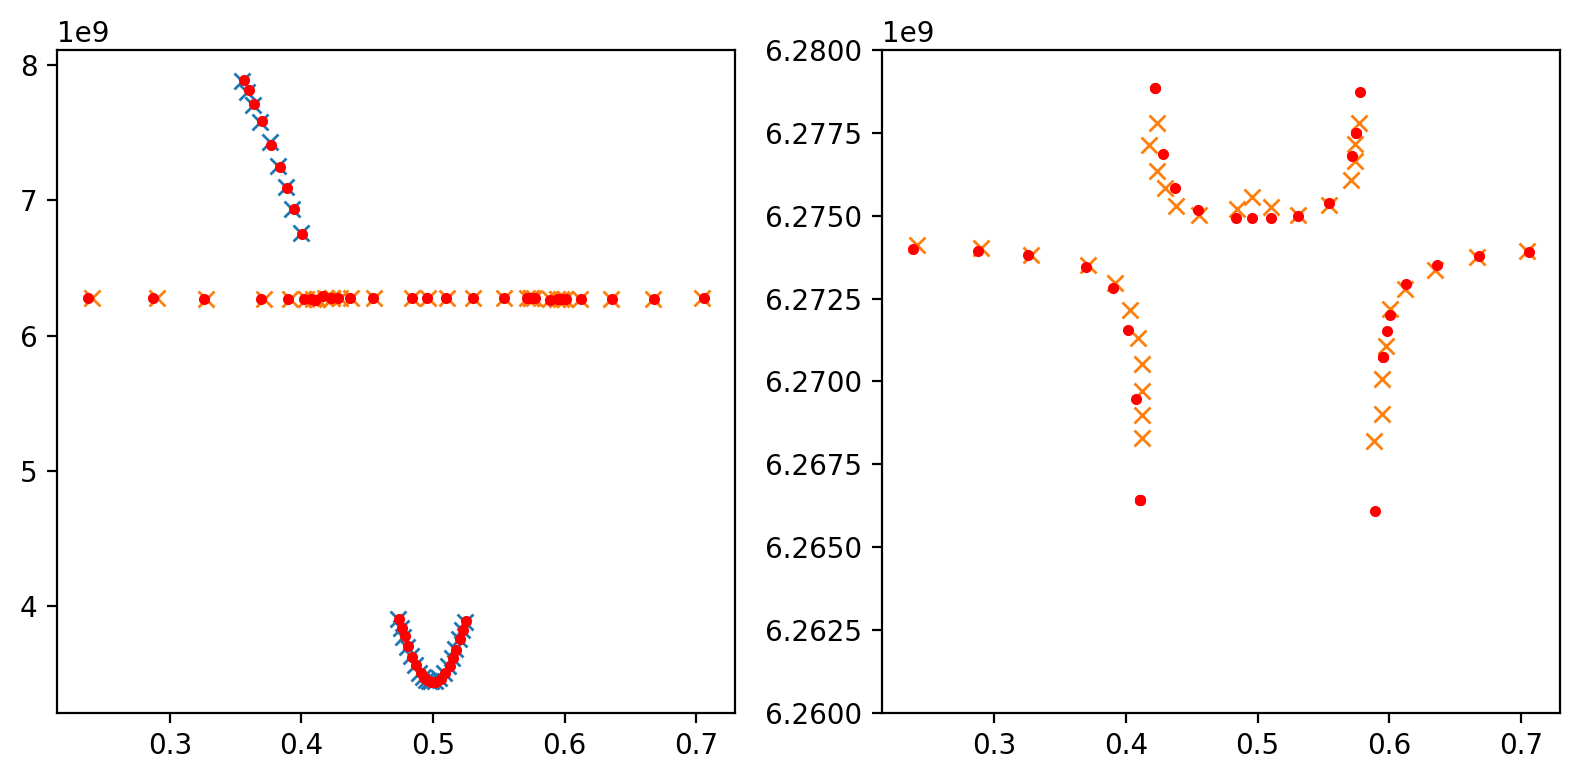

In [390]:
φ_ext_F_guess, ωF_vs_φ_ext_guess, φ_ext_R_guess, ωR_vs_φ_ext_guess = theoretical_spectrum(parameters_guess, data_set, out='spectrum')

fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=[8,4], dpi=200)
for ax in (ax1, ax2):
    ax.plot(φ_ext_exp_F, ω_exp_F, 'x')
    ax.plot(φ_ext_exp_R, ω_exp_R, 'x')
    ax.plot(φ_ext_F_guess, ωF_vs_φ_ext_guess, '.r')
    ax.plot(φ_ext_R_guess, ωR_vs_φ_ext_guess, '.r')
    
ax2.set_ylim([6.26e9,6.28e9])
fig.tight_layout()

### Optimize or load previous optimization

In [391]:
data_set_path = os.path.join(os.getcwd() + opt_dir, experiment_name + '_data_set.pkl')
parameters_path = os.getcwd() + opt_dir + experiment_name + '.npz'
if load:
    with open(data_set_path, 'rb') as f:
        data_set = pickle.load(f)
    parameters_opt, parameters_guess, bounds = fits.load_optimization_results(experiment_name)
else:
    with open(data_set_path, 'wb') as f:
        pickle.dump(data_set, f)
    parameters_opt = minimize(theoretical_spectrum, parameters_guess, data_set, bounds=bounds, method=method).x
    np.savez(parameters_path, parameters_opt=parameters_opt,
             parameters_guess = np.array(parameters_guess), bounds=np.array(bounds))

0.190610322650691
0.190610330359807
0.19061034089221662
0.19061035322957176
0.1906877977195145
0.19075779748056787
0.19061033011053263
0.19061032310986947
0.19061033288398788
0.19061048249143964
0.19061068675862414
98.90188812523571
19.46551636249828
1.715290546096052
0.24566781211181388
0.18897751240903427
0.18897751706533894
0.18897752412940205
0.18897753391551708
0.18895344940201886
0.18893084916429492
0.188977475811964
0.18897751009161068
0.18897752234685905
0.18897749318334833
0.1889774885881832
71.04174377567429
5.679684121546066
0.5570837081278976
0.19677571822790396
0.1891648678887452
0.18851910802950966
0.18851910628789215
0.18851910498332947
0.18851910544478345
0.18840770892519698
0.18838512059323298
0.1885191301293303
0.18851910941111383
0.18851911772002294
0.1885190228727125
0.18851889450026293
78.31045943751374
5.4961197202917145
0.4624470304268127
0.19095353154704542
0.1871382347851136
0.18713823304932875
0.18713823174101263
0.187138232171566
0.1869937653749809
0.18686264

In [392]:
print('Guessed parameters \n')
[print(name + f' = {value:.3f}') for name, value in zip(parameter_names, parameters_guess)];
print('\n')
print('Optimized parameters \n')
[print(name + f' = {value:.3f}') for name, value in zip(parameter_names, parameters_opt)];

Guessed parameters 

CF_2 = 22.758
LF_2 = 20.141
EJ_2 = 9.592
I0_F_2 = 0.005
I_origin_F_2 = -0.005
CR_2 = 6.368
LR_2 = 101.043
Δ_2 = 0.224
I0_R_2 = 0.005
I_origin_R_2 = 0.000


Optimized parameters 

CF_2 = 22.754
LF_2 = 20.143
EJ_2 = 9.589
I0_F_2 = 0.005
I_origin_F_2 = -0.005
CR_2 = 6.368
LR_2 = 101.043
Δ_2 = 0.224
I0_R_2 = 0.005
I_origin_R_2 = 0.000


### Plot fits and errors

(6265000000.0, 6280000000.0)

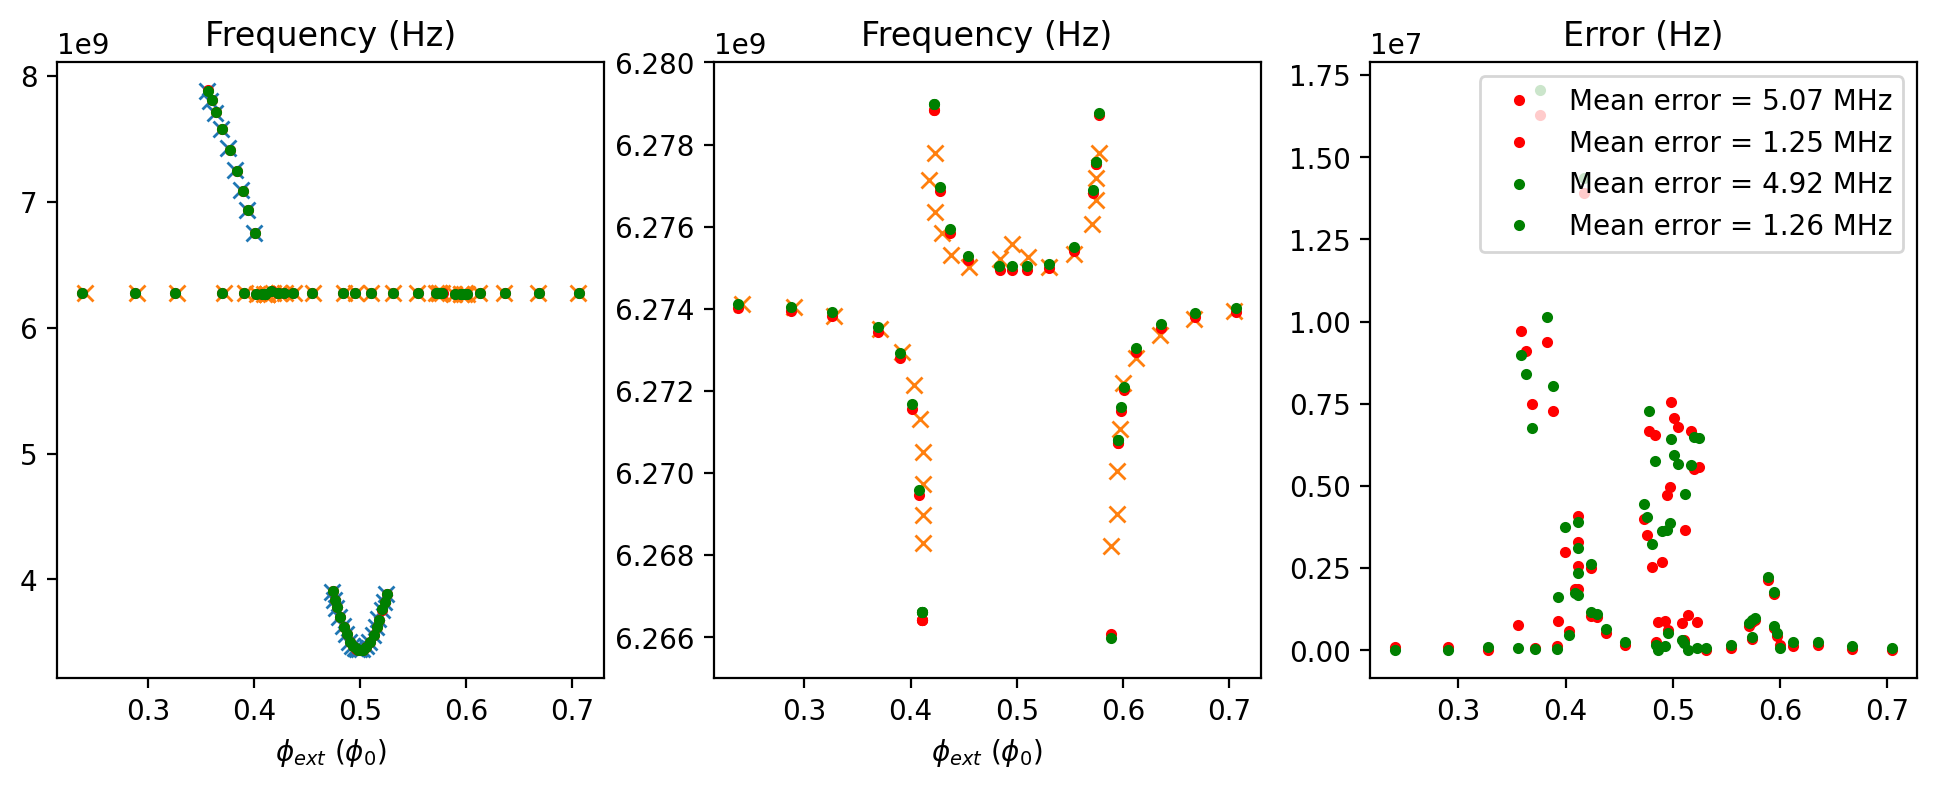

In [395]:
φ_ext_F_opt, ωF_vs_φ_ext_opt, φ_ext_R_opt, ωR_vs_φ_ext_opt = theoretical_spectrum(parameters_opt, data_set, out='spectrum')

fig, (ax1, ax2, ax3) = plt.subplots(ncols=3, figsize=[4*3,4], dpi=200)
for ax in (ax1, ax2):
    ax.plot(φ_ext_exp_F     , ω_exp_F   , 'x')
    ax.plot(φ_ext_exp_R     , ω_exp_R   , 'x')
    ax.plot(φ_ext_F_guess   , ωF_vs_φ_ext_guess , '.r')
    ax.plot(φ_ext_R_guess   , ωR_vs_φ_ext_guess , '.r')
    ax.plot(φ_ext_F_opt     , ωF_vs_φ_ext_opt   , '.g')
    ax.plot(φ_ext_R_opt     , ωR_vs_φ_ext_opt   , '.g')
    ax.set_xlabel('$\phi_{ext}$ ($\phi_0$)')

ax3.plot(φ_ext_exp_F, np.abs(ωF_vs_φ_ext_guess - ω_exp_F), 'r.', label = f'Mean error = {np.abs(ωF_vs_φ_ext_guess-ω_exp_F).mean()/1e6:.2f} MHz' )
ax3.plot(φ_ext_exp_R, np.abs(ωR_vs_φ_ext_guess - ω_exp_R), 'r.', label = f'Mean error = {np.abs(ωR_vs_φ_ext_guess-ω_exp_R).mean()/1e6:.2f} MHz'  )
ax3.plot(φ_ext_exp_F, np.abs(ωF_vs_φ_ext_opt   - ω_exp_F), 'g.', label = f'Mean error = {np.abs(ωF_vs_φ_ext_opt   - ω_exp_F).mean()/1e6:.2f} MHz' )
ax3.plot(φ_ext_exp_R, np.abs(ωR_vs_φ_ext_opt   - ω_exp_R), 'g.', label = f'Mean error = {np.abs(ωR_vs_φ_ext_opt   - ω_exp_R).mean()/1e6:.2f} MHz'  )
ax3.legend()
ax1.set_title('Frequency (Hz)')
ax2.set_title('Frequency (Hz)')
ax3.set_title('Error (Hz)')
ax2.set_ylim([6.265e9,6.28e9])



# Qubit 3

In [184]:
experiment_name = 'qubit_3'
load = False


### Load spectral data and theoretical model

In [178]:
φ_ext_exp, ω_exp, I_exp, I0, Iss = fits.get_experimental_spectrum(experiment_name)

In [179]:
theoretical_spectrum = fits.get_theoretical_spectrum(experiment_name)

## Guess parameters and set bounds

In [192]:
CR_3, CF_3, LF_3, LR_3, EJ_3, Δ_3, ω_r_3 = sq_ext.get_experimental_parameters(experiment_name)
CF_3, LF_3, EJ_3

(25.2, 31.6, 5.6)

In [198]:
CF_3, LF_3, EJ_3 = (26.469686661169657, 30.0, 5.780487830155092)

In [199]:
I0_guess = I0
I_origin_guess = Iss - I0/2
parameters_guess = [CF_3, LF_3, EJ_3, I0_guess, I_origin_guess]

parameter_names = ['CF_3', 'LF_3', 'EJ_3', 'I0', 'I_origin']
bounds = fits.create_bounds(parameters_guess)
data_set = ([I_exp, ω_exp])

(0.45, 0.55)

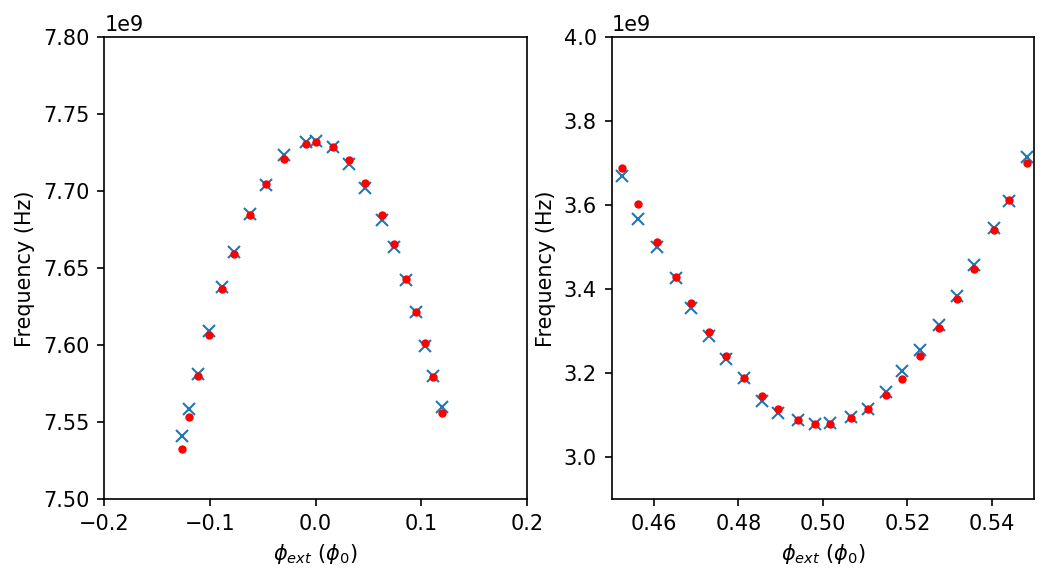

In [200]:
φ_ext_guess, ω_guess = theoretical_spectrum(parameters_guess, data_set, out='spectrum')
fig, (ax1, ax2) = plt.subplots(dpi=150, ncols=2, figsize=[8,4])
for ax in (ax1, ax2):
    ax.plot(φ_ext_guess, ω_exp, 'x')
    ax.plot(φ_ext_guess, ω_guess, 'r.')
    ax.set_ylabel('Frequency (Hz)')
    ax.set_xlabel(r'$\phi_{ext}$ ($\phi_0$)')
ax1.set_ylim([7.5e9,7.8e9])
ax1.set_xlim([-0.2,0.2])
ax2.set_ylim([2.9e9,4e9])
ax2.set_xlim([0.45,0.55])

## Optimize or load previous optimization

In [201]:
data_set_path = os.path.join(os.getcwd() + opt_dir, experiment_name + '_data_set.pkl')
parameters_path = os.getcwd() + opt_dir + experiment_name + '.npz'
if load:
    with open(data_set_path, 'rb') as f:
        data_set = pickle.load(f)
    parameters_opt, parameters_guess, bounds = fits.load_optimization_results(experiment_name)
else:
    with open(data_set_path, 'wb') as f:
        pickle.dump(data_set, f)
    parameters_opt = minimize(theoretical_spectrum, parameters_guess, data_set, bounds=bounds, method='SLSQP').x
    np.savez(parameters_path, parameters_opt=parameters_opt,
             parameters_guess = np.array(parameters_guess), bounds=np.array(bounds))

0.24873490330511405
0.24873491583596063
0.24873491288817684
0.24873489865040987
0.24949831833197988
0.2504387553205163
104.40863704988557
14.956198172148618
2.832499136020663
0.5105235482275265
0.16024448388495705
0.1602444711491402
0.16024447220155746
0.1602444819203086
0.1599628154956223
0.15978228285528662
34.53179815528566
4.301364615890335
0.4989814349782109
0.16900534893246322
0.1603497305520203
0.16021139819972552
0.1601558356622892
0.16015583323211935
0.16015583121871524
0.16015582194607747
0.15975622871964257
0.15962492932165384
23.848960578857923
2.898917061463493
0.3046408068560633
0.16272771522024332
0.15944644396268393
0.1594464357264309
0.15944643907478007
0.15944646385644035
0.1590825207788753
0.15879392036520557
20.90693176337982
2.0187249143332098
0.28174835137189547
0.16031613042214543
0.1588386695528774
0.1588386694353643
0.15883866885024567
0.15883866987835393
0.15846865195844906
0.15824811656051851
81.86464297005497
7.943299428251771
0.8879455222667914
0.1643254244

In [202]:
print('Guessed parameters \n')
[print(name + f' = {value:.3f}') for name, value in zip(parameter_names, parameters_guess)];
print('\n')
print('Optimized parameters \n')
[print(name + f' = {value:.3f}') for name, value in zip(parameter_names, parameters_opt)];

Guessed parameters 

CF_3 = 26.470
LF_3 = 30.000
EJ_3 = 5.780
I0 = 0.002
I_origin = -0.001


Optimized parameters 

CF_3 = 26.085
LF_3 = 30.465
EJ_3 = 5.719
I0 = 0.002
I_origin = -0.001


## Plot fits and errors

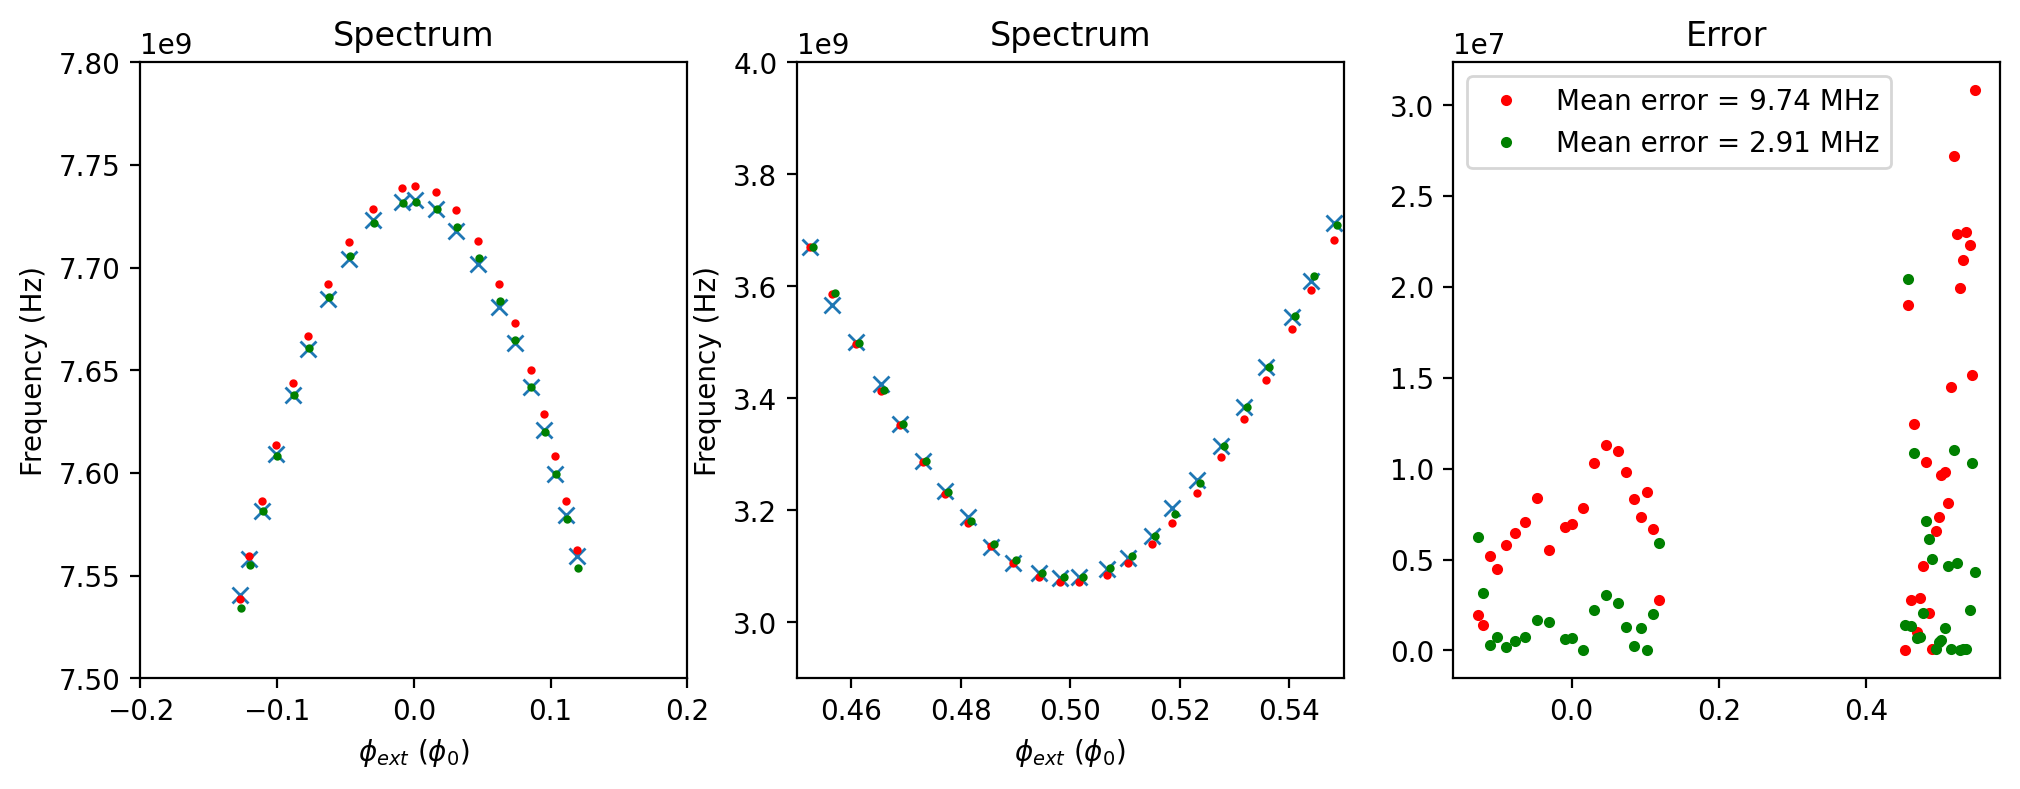

In [197]:
φ_ext_opt, ω_opt = theoretical_spectrum(parameters_opt  , data_set,  out = 'spectrum')

fig, (ax1, ax2, ax3 )= plt.subplots(ncols=3, dpi=200, figsize=[4*3,4])
for ax in (ax1, ax2):
    ax.plot(φ_ext_opt, ω_exp, 'x')
    ax.plot(φ_ext_guess, ω_guess, 'r.', markersize=4)
    ax.plot(φ_ext_opt, ω_opt, 'g.', markersize=4)
    ax.set_ylabel('Frequency (Hz)')
    ax.set_xlabel('$\phi_{ext}$ ($\phi_0$)')
    ax.set_title('Spectrum')
ax1.set_ylim([7.5e9,7.8e9])
ax1.set_xlim([-0.2,0.2])
ax2.set_ylim([2.9e9,4e9])
ax2.set_xlim([0.45,0.55])
ax3.set_title('Error')
ax3.plot(φ_ext_exp, np.abs(ω_guess-ω_exp), 'r.' , label = f'Mean error = {np.abs(ω_guess-ω_exp).mean()/1e6:.2f} MHz' )
ax3.plot(φ_ext_exp, np.abs(ω_opt-ω_exp), 'g.'   , label = f'Mean error = {np.abs(ω_opt-ω_exp).mean()/1e6:.2f} MHz'  )
ax3.legend()

# Resonator 3

In [286]:
experiment_name = 'resonator_3'
load = False

### Load spectral data and theoretical model

In [279]:
φ_ext_exp, ω_exp, I_exp, I0, Iss = fits.get_experimental_spectrum(experiment_name)

In [280]:
theoretical_spectrum = fits.get_theoretical_spectrum(experiment_name)

## Guess parameters and set bounds

In [302]:
CF_3, LF_3, EJ_3, _, _ = np.load(os.getcwd() + opt_dir +  'qubit_3' + '.npz')['parameters_opt']
CR_3, _, _, LR_3, _, Δ_3, ω_r_3 = sq_ext.get_experimental_parameters(experiment_name)
# Δ_3 +=0.4
C_int_33 = -500
I0_guess = I0
I_origin_guess = Iss - I0/2
crossing_index_1  = 10
crossing_index_2  = 8

parameter_names = ['C_int_33', 'CR_3', 'LR_3', 'I0_guess', 'I_origin_guess' ]

parameters_guess = [C_int_33, CR_3, LR_3 ,I0_guess, I_origin_guess ]
data_set = ([I_exp, ω_exp, crossing_index_1, crossing_index_2, CF_3, LF_3, EJ_3, Δ_3,  nmax_r, nmax_f ])
bounds= fits.create_bounds(parameters_guess)

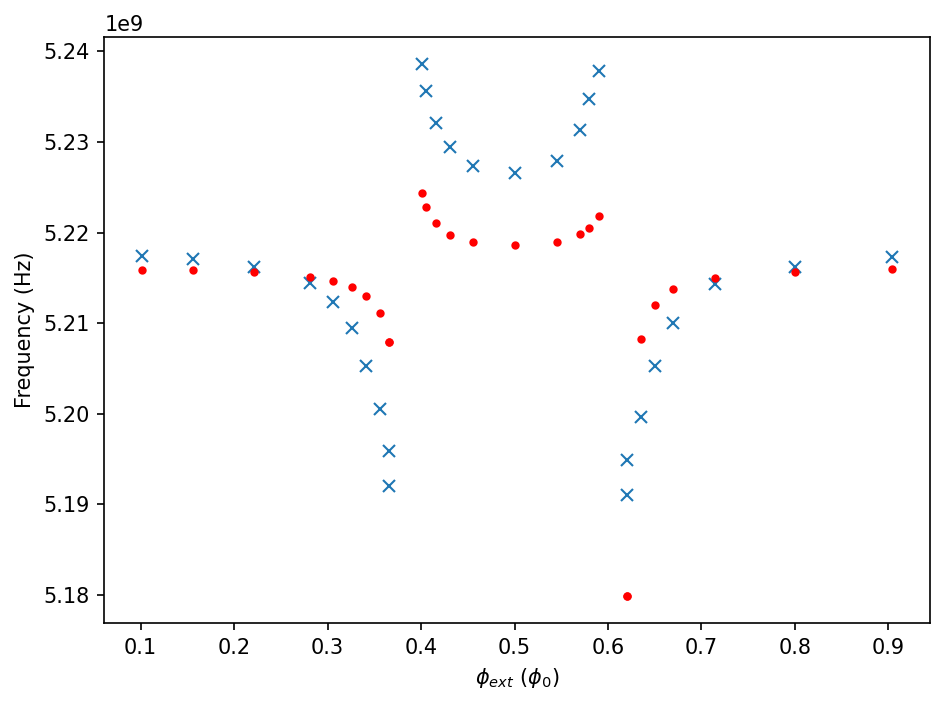

In [303]:
φ_ext_guess, ω_guess = theoretical_spectrum(parameters_guess, data_set, out='spectrum')

fig, ax = plt.subplots(dpi=150)
ax.plot(φ_ext_guess, ω_exp, marker='x', ls='')
ax.plot(φ_ext_guess, ω_guess, '.r')

ax.set_ylabel('Frequency (Hz)')
ax.set_xlabel('$\phi_{ext}$ ($\phi_0$)')
fig.tight_layout()

Okay, so, here we have a bit of trouble. The problem is that according to the Delta estimated geometrically this splitting is already too small. If on top of that we add repulsion by a capacitive coupling then the splitting can only be bigger. I would need the single circuit spectra to be able to extract Delta from that, and then come to this one and get the capacitive interaction.

## Optimize or load previous optimization

In [287]:
if load:
    parameters_opt, parameters_guess, bounds = fits.load_optimization_results(experiment_name)
else:
    parameters_opt = minimize(theoretical_spectrum, parameters_guess, data_set, bounds=bounds, method = method).x
    np.savez(os.getcwd() + opt_dir + experiment_name + '.npz', parameters_opt=parameters_opt,
             parameters_guess = np.array(parameters_guess), bounds=np.array(bounds))

0.8960603680731323
0.8960603680683565
0.8960603909894278
0.8960603710053938
0.8961287692274622
0.896157477408777
10.43734154495925
1.2377573256439662
0.8274154939518548
0.8274154939480987
0.8274154823717366
0.8274154922199815
0.8274744643725365
0.827494293527244
8.078494050602188
0.7687108323720695
0.7687108323681375
0.7687108284347799
0.7687108316706786
0.7687081910609992
0.7686714454920853
23.439103238931303
2.397192308872458
0.81426260413817
0.7671688597899493
0.7671688597857091
0.7671688558762435
0.7671688590915817
0.7671669720617524
0.7671311539311176
11.892977703685657
1.470759305338074
0.7966934875080032
0.7678351544221567
0.7669663355870302
0.7669663355829321
0.7669663385848322
0.7669663358213921
0.7669643557170609
0.7669282562381481
0.668695969912946
0.6686959699089474
0.668695970066044
0.6686959697772616
0.6686572371561637
0.6687743808767035
1.022615852267574
0.6352166483101369
0.6352166483062129
0.6352166478761987
0.6352166480958452
0.6352153548366628
0.6352254246729752
0.63

In [288]:
print('Guessed parameters \n')
[print(name + f' = {value:.3f}') for name, value in zip(parameter_names, parameters_guess)];
print('\n')
print('Optimized parameters \n')
[print(name + f' = {value:.3f}') for name, value in zip(parameter_names, parameters_opt)];

Guessed parameters 

C_int_33 = 1300.000
CR_3 = 11.245
LR_3 = 82.640
I0_guess = 0.002
I_origin_guess = -0.001


Optimized parameters 

C_int_33 = 1304.670
CR_3 = 5.463
LR_3 = 170.000
I0_guess = 0.002
I_origin_guess = -0.001


## Plot fits and errors

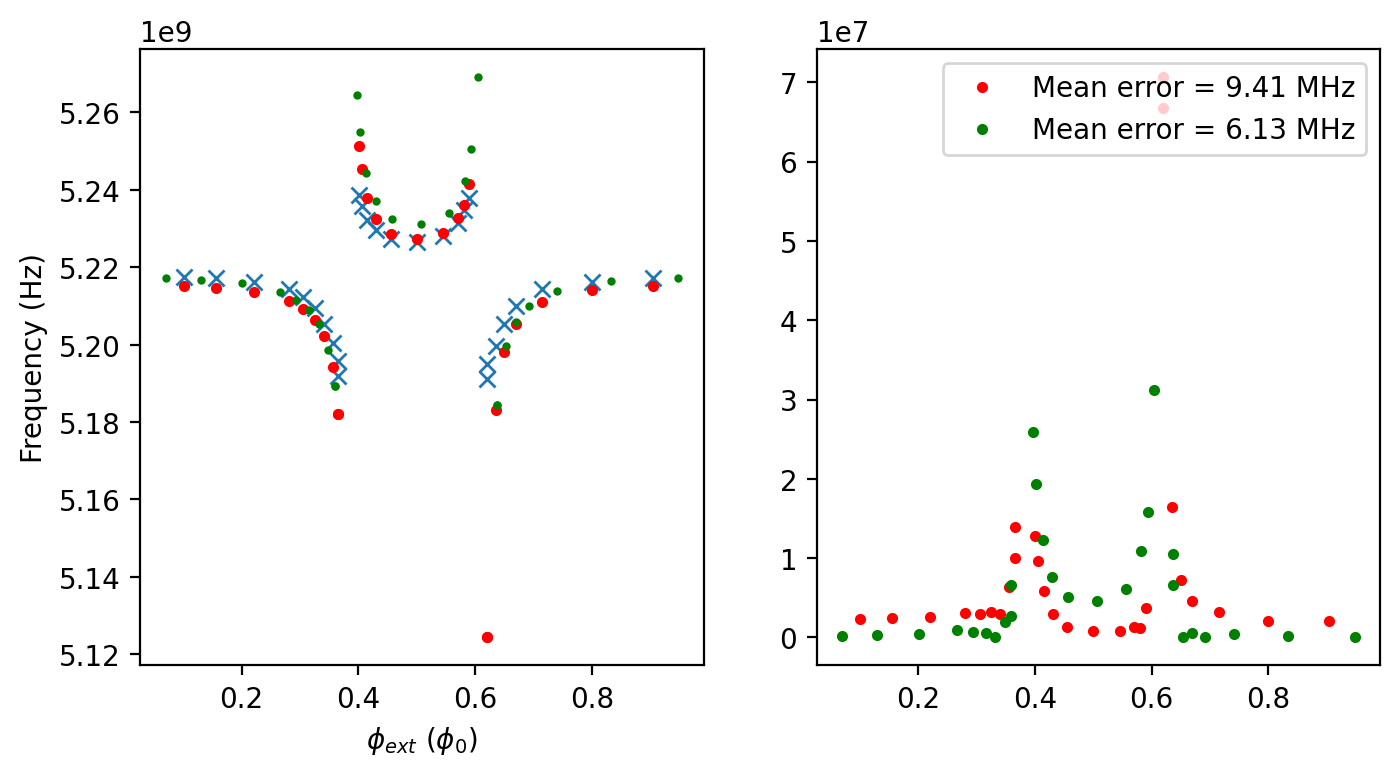

In [289]:
φ_ext_opt , ω_opt = theoretical_spectrum(parameters_opt, data_set, out='spectrum')

fig, (ax1, ax2 )= plt.subplots(ncols=2, dpi=200, figsize=[8,4])
ax1.plot(φ_ext_exp, ω_exp, marker='x', ls='', label='Resonator 1')
ax1.plot(φ_ext_guess, ω_guess, '.r')
ax1.plot(φ_ext_opt, ω_opt, 'g.', markersize=4)
ax1.set_ylabel('Frequency (Hz)')
ax1.set_xlabel('$\phi_{ext}$ ($\phi_0$)')

ax2.plot(φ_ext_guess, np.abs(ω_guess - ω_exp), 'r.' , label = f'Mean error = {np.abs(ω_guess-ω_exp).mean()/1e6:.2f} MHz' )
ax2.plot(φ_ext_opt, np.abs(ω_opt   - ω_exp), 'g.'   , label = f'Mean error = {np.abs(ω_opt-ω_exp).mean()/1e6:.2f} MHz'  )
ax2.legend()

# Qubit 3 and Resonator 3

In [273]:
experiment_name = 'resonator_and_qubit_3'


### Load spectral data and theoretical model

In [274]:
φ_ext_exp_F, ω_exp_F, I_exp_F, I0_F, Iss_F = fits.get_experimental_spectrum('qubit_3')
φ_ext_exp_R, ω_exp_R, I_exp_R, I0_R, Iss_R = fits.get_experimental_spectrum('resonator_3')

In [275]:
theoretical_spectrum = fits.get_theoretical_spectrum(experiment_name)

### Guess parameters and set bounds

In [276]:
CF_3, LF_3, EJ_3, I0_F_3, I_origin_F_3= np.load(os.getcwd() + opt_dir +  'qubit_3' + '.npz')['parameters_opt']
C_int_33, CR_3, LR_3, I0_R_3, I_origin_R_3 = np.load(os.getcwd() + opt_dir +  'resonator_3' + '.npz')['parameters_opt']

crossing_index_1_F = 22
crossing_index_1_F = 24
crossing_index_1_R = 10
crossing_index_2_R = 8
nmax_r = 5
nmax_f = 15
# C_int = 500

data_set = ([I_exp_F, ω_exp_F, I_exp_R, ω_exp_R, Δ_3, crossing_index_1_F, crossing_index_1_R, crossing_index_2_R, nmax_r, nmax_f])
parameters_guess = [CF_3, LF_3, EJ_3, I0_F_3, I_origin_F_3, C_int_33, CR_3, LR_3, I0_R_3, I_origin_R_3]

parameter_names = ['CF_3', 'LF_3', 'EJ_3', 'I0_F_3', 'I_origin_F_3',
                   'C_int_33', 'CR_3', 'LR_3', 'I0_R_3', 'I_origin_R_3']

bounds = ((20,30), (20,30), (4,15), (I0_F_3*0.9, I0_F_3*1.1), (I_origin_F_3*1.1, I_origin_F_3*0.9),
          (10, 1000), (2,25), (30,170), (I0_R_3*0.9, I0_R_3*1.1), (I_origin_R_3*1.1, I_origin_R_3*0.9))

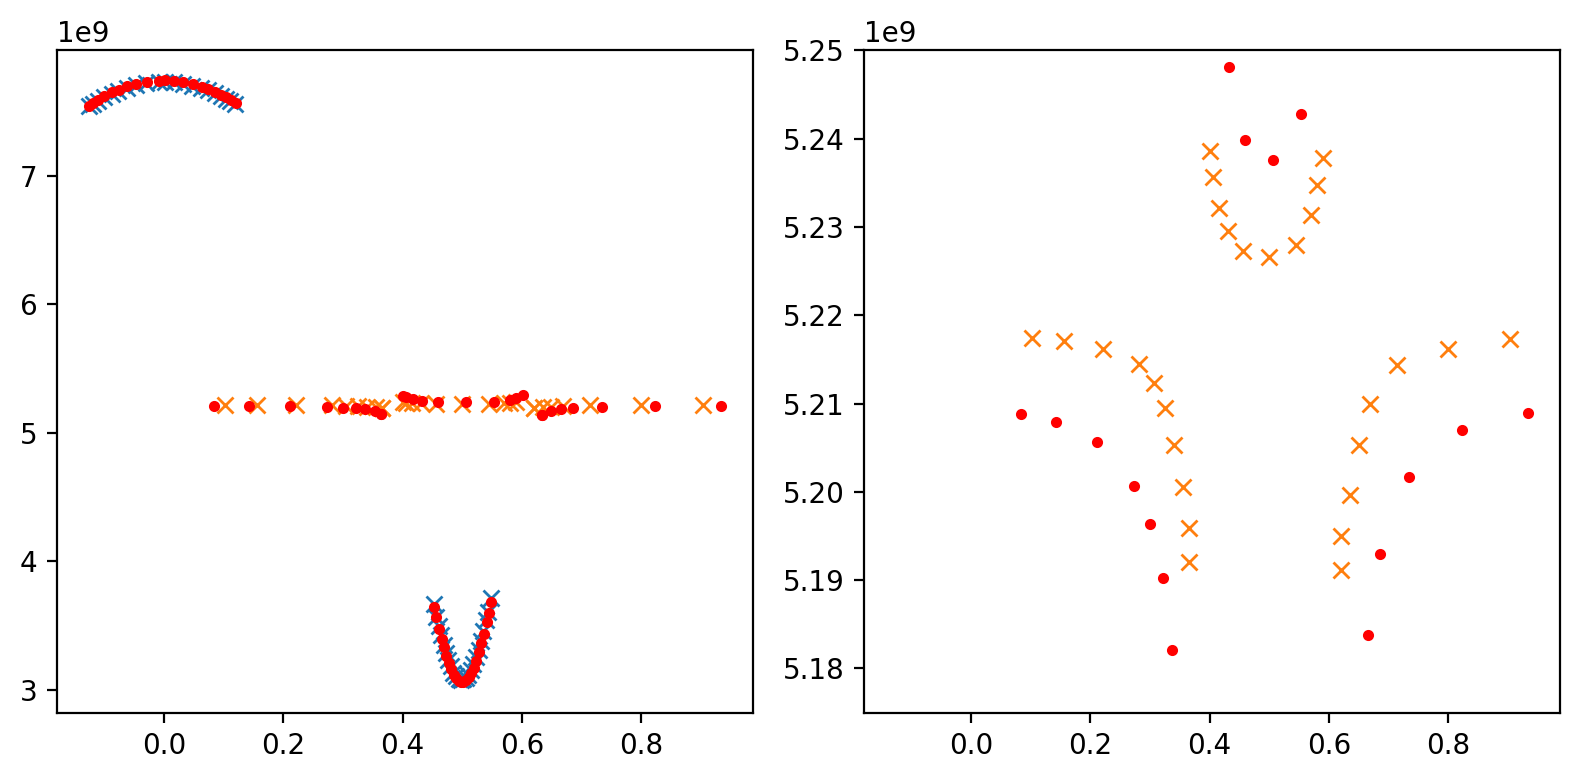

In [277]:
φ_ext_F_guess, ωF_vs_φ_ext_guess, φ_ext_R_guess, ωR_vs_φ_ext_guess = theoretical_spectrum(parameters_guess, data_set, out='spectrum')

fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=[8,4], dpi=200)
for ax in (ax1, ax2):
    ax.plot(φ_ext_exp_F, ω_exp_F, 'x')
    ax.plot(φ_ext_exp_R, ω_exp_R, 'x')
    ax.plot(φ_ext_F_guess, ωF_vs_φ_ext_guess, '.r')
    ax.plot(φ_ext_R_guess, ωR_vs_φ_ext_guess, '.r')
    
ax2.set_ylim([5.175e9,5.25e9])
fig.tight_layout()

### Optimize or load previous optimization

In [289]:
data_set_path = os.path.join(os.getcwd() + opt_dir, experiment_name + '_data_set.pkl')
parameters_path = os.getcwd() + opt_dir + experiment_name + '.npz'
if load:
    with open(data_set_path, 'rb') as f:
        data_set = pickle.load(f)
    parameters_opt, parameters_guess, bounds = fits.load_optimization_results(experiment_name)
else:
    with open(data_set_path, 'wb') as f:
        pickle.dump(data_set, f)
    parameters_opt = minimize(theoretical_spectrum, parameters_guess, data_set, bounds=bounds, method=method).x
    np.savez(parameters_path, parameters_opt=parameters_opt,
             parameters_guess = np.array(parameters_guess), bounds=np.array(bounds))

In [290]:
print('Guessed parameters \n')
[print(name + f' = {value:.3f}') for name, value in zip(parameter_names, parameters_guess)];
print('\n')
print('Optimized parameters \n')
[print(name + f' = {value:.3f}') for name, value in zip(parameter_names, parameters_opt)];

Guessed parameters 

CF_3 = 26.470
LF_3 = 30.000
EJ_3 = 5.780
I0_F_3 = 0.002
I_origin_F_3 = -0.001
C_int_33 = 1300.000
CR_3 = 11.250
LR_3 = 82.641
I0_R_3 = 0.002
I_origin_R_3 = -0.001


Optimized parameters 

CF_3 = 26.472
LF_3 = 29.988
EJ_3 = 5.764
I0_F_3 = 0.002
I_origin_F_3 = -0.001
C_int_33 = 1000.000
CR_3 = 11.247
LR_3 = 82.641
I0_R_3 = 0.002
I_origin_R_3 = -0.001


### Plot fits and errors

(5175000000.0, 5250000000.0)

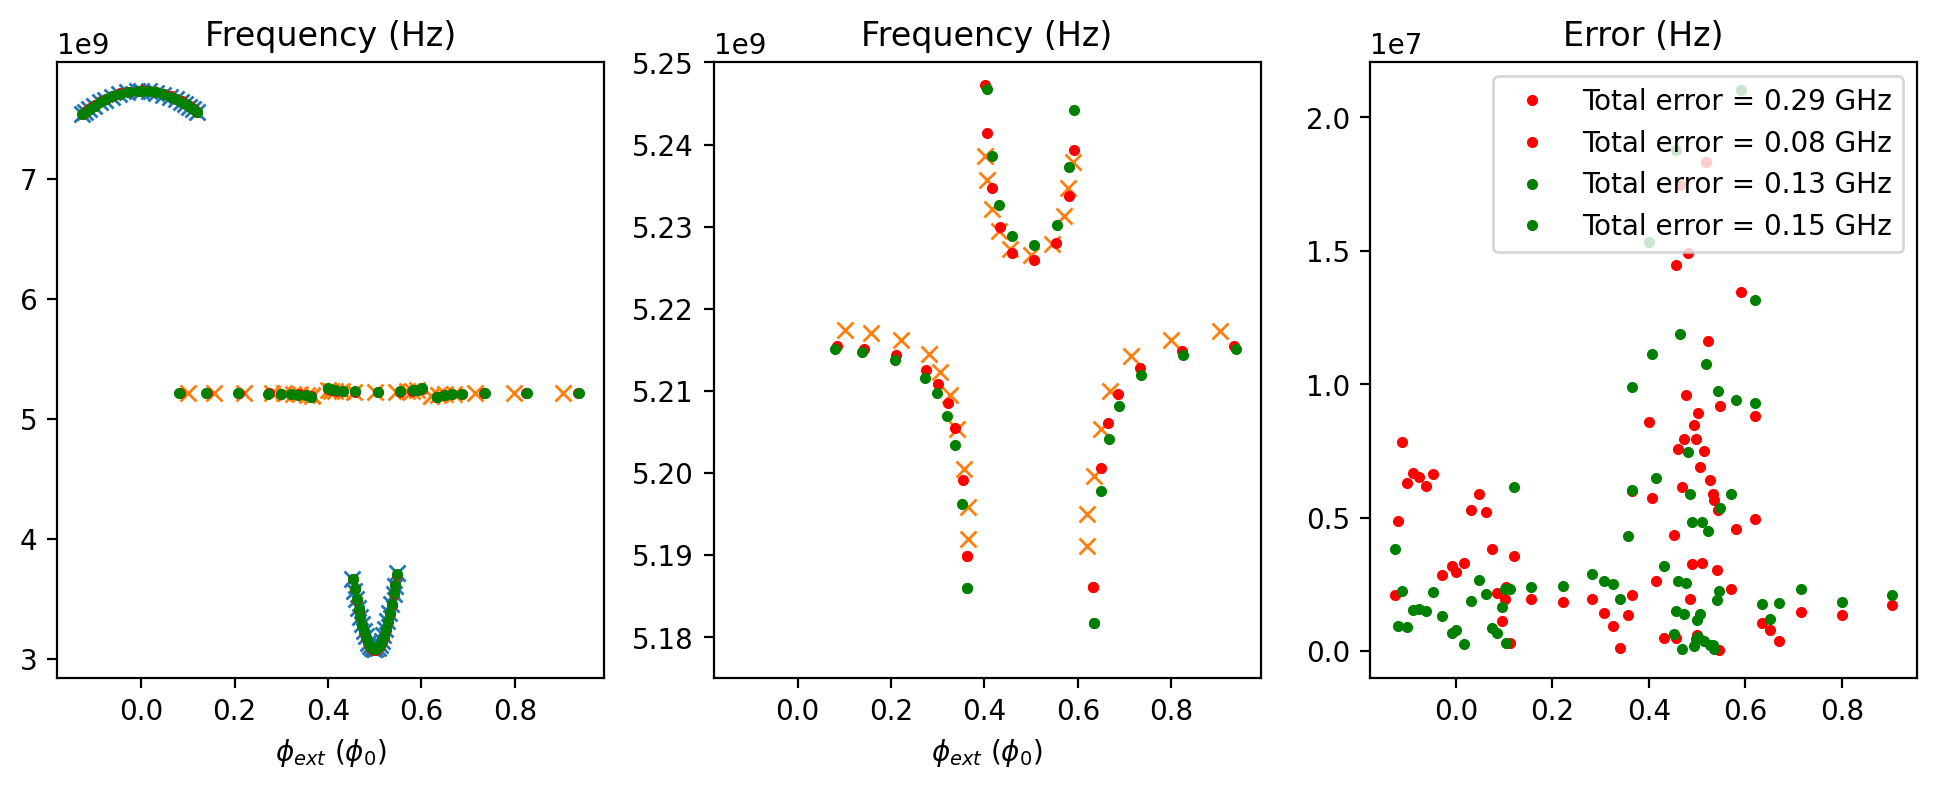

In [291]:
φ_ext_F_opt, ωF_vs_φ_ext_opt, φ_ext_R_opt, ωR_vs_φ_ext_opt = theoretical_spectrum(parameters_opt, data_set, out='spectrum')

fig, (ax1, ax2, ax3) = plt.subplots(ncols=3, figsize=[4*3,4], dpi=200)
for ax in (ax1, ax2):
    ax.plot(φ_ext_exp_F     , ω_exp_F   , 'x')
    ax.plot(φ_ext_exp_R     , ω_exp_R   , 'x')
    ax.plot(φ_ext_F_guess   , ωF_vs_φ_ext_guess , '.r')
    ax.plot(φ_ext_R_guess   , ωR_vs_φ_ext_guess , '.r')
    ax.plot(φ_ext_F_opt     , ωF_vs_φ_ext_opt   , '.g')
    ax.plot(φ_ext_R_opt     , ωR_vs_φ_ext_opt   , '.g')
    ax.set_xlabel('$\phi_{ext}$ ($\phi_0$)')

ax3.plot(φ_ext_exp_F, np.abs(ωF_vs_φ_ext_guess - ω_exp_F), 'r.', label = f'Mean error = {np.abs(ωF_vs_φ_ext_guess-ω_exp_F).mean()/1e6:.2f} MHz' )
ax3.plot(φ_ext_exp_R, np.abs(ωR_vs_φ_ext_guess - ω_exp_R), 'r.', label = f'Mean error = {np.abs(ωR_vs_φ_ext_guess-ω_exp_R).mean()/1e6:.2f} MHz'  )
ax3.plot(φ_ext_exp_F, np.abs(ωF_vs_φ_ext_opt   - ω_exp_F), 'g.', label = f'Mean error = {np.abs(ωF_vs_φ_ext_opt   - ω_exp_F).mean()/1e6:.2f} MHz' )
ax3.plot(φ_ext_exp_R, np.abs(ωR_vs_φ_ext_opt   - ω_exp_R), 'g.', label = f'Mean error = {np.abs(ωR_vs_φ_ext_opt   - ω_exp_R).mean()/1e6:.2f} MHz'  )
ax3.legend()
ax1.set_title('Frequency (Hz)')
ax2.set_title('Frequency (Hz)')
ax3.set_title('Error (Hz)')
ax2.set_ylim([5.175e9,5.25e9])


# Qubit 1 - Qubit 2 avoided crossing while Qubit 3 is off-resonant

In [77]:
experiment_name = 'qubit_1_qubit_2'


### Load spectral data and theoretical model

In [78]:
ω_exp, I_exp = fits.get_experimental_spectrum(experiment_name)

In [79]:
theoretical_spectrum = fits.get_theoretical_spectrum(experiment_name)

## Guess parameters and set bounds

In [145]:
CF_1, LF_1, EJ_1, _, _= np.load(os.getcwd() + opt_dir +  'qubit_1' + '.npz')['parameters_opt']
CF_2, LF_2, EJ_2, _, _= np.load(os.getcwd() + opt_dir +  'qubit_2' + '.npz')['parameters_opt']

# Initial conditions 1
# CF_1, LF_1, EJ_1 = (25.46, 28.11, 5.18)
# LF_1-=0.0275

# Initial conditions 2
CF_1, LF_1, EJ_1 = (32.15, 22.06, 6.19)
LF_1-=0.0675

In [146]:
φ_ext_i = 0.517
φ_ext_f = 0.52
C_int_12 = 15000
nmax_f = 15

data_set = [CF_1, EJ_1, CF_2, LF_2, EJ_2, I_exp, ω_exp, nmax_f]
parameters_guess = [C_int_12, φ_ext_i, φ_ext_f, LF_1]
parameter_names =  ['C_int_12', 'φ_ext_i', 'φ_ext_f', 'LF_1']
φ_ext_guess, ω_guess = theoretical_spectrum(parameters_guess, data_set, out='spectrum')
bounds = fits.create_bounds(parameters_guess)

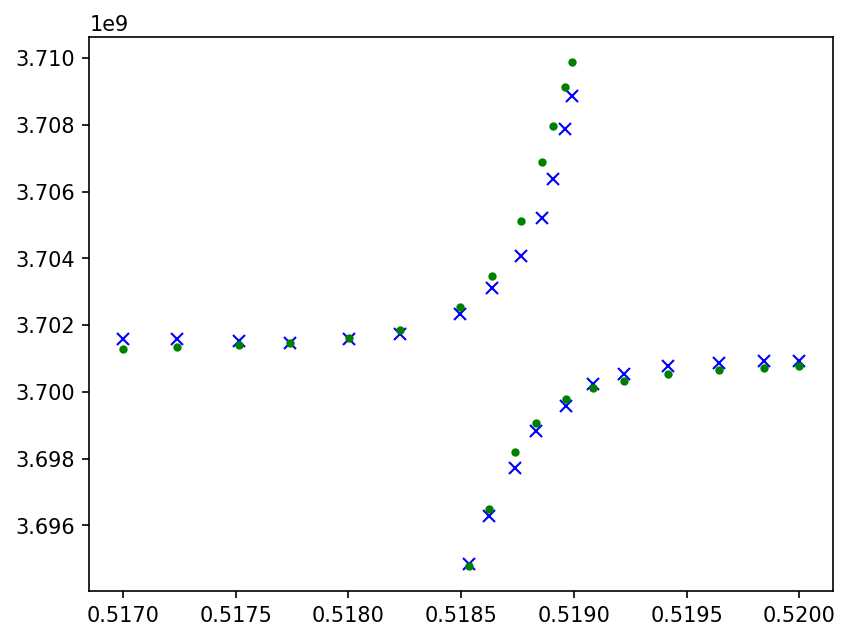

In [147]:
fig, ax = plt.subplots(dpi=150)

for i in range(len(ω_exp)):
    ax.plot(φ_ext_guess[i], ω_exp[i]*1e9, 'xb')
    ax.plot(φ_ext_guess[i], ω_guess[i]*1e9, '.g')

## Optimize or load previous optimization

In [148]:
load = False
method = 'SLSQP'

In [149]:
data_set_path = os.path.join(os.getcwd() + opt_dir, experiment_name + '_data_set.pkl')
parameters_path = os.getcwd() + opt_dir + experiment_name + '.npz'
if load:
    with open(data_set_path, 'rb') as f:
        data_set = pickle.load(f)
    parameters_opt, parameters_guess, bounds = fits.load_optimization_results(experiment_name)
else:
    with open(data_set_path, 'wb') as f:
        pickle.dump(data_set, f)
    parameters_opt = minimize(theoretical_spectrum, parameters_guess, data_set, bounds=bounds, method='Nelder-Mead').x
    np.savez(parameters_path, parameters_opt=parameters_opt,
             parameters_guess = np.array(parameters_guess), bounds=np.array(bounds))

0.010348186985736252
0.009772357081616168
6.38135155493432
4.543497194342154
2.3144140932965827
2.0991731034972827
4.821703997846017
2.265171235064843
2.8344019477065028
1.8502538631685286
2.7197034778522284
1.4022313649465308
4.288224619830618
1.3737976959557527
1.2144418559314825
1.2428574408857638
2.3338080275158917
0.5170687719435594
1.0461626966831994
1.065520140049259
0.8085120913219312
1.0885570114866217
0.6294590241699498
0.5029582392098475
0.6213633170017867
0.30900365500454585
0.779909589345738
0.20983592882281288
0.5193026472795315
0.26664668481296827
0.2503836738323204
0.36042001627527176
0.10525817705144247
0.22792508876070583
0.11482531259103679
0.2541759140195432
0.10285196017971687
0.09774689777461765
0.11613431340527702
0.04935469633522649
0.22656706217144018
0.04840771580024272
0.08443269708174439
0.04463051122089512
0.05370983699097964
0.027046455468727526
0.04098813996054895
0.05702471502787132
0.024386168699683797
0.0464043033875412
0.022231879506112495
0.017034918

Optimization for initial conditions 2

In [150]:
print('Guessed parameters \n')
[print(name + f' = {value:.3f}') for name, value in zip(parameter_names, parameters_guess)];
print('\n')
print('Optimized parameters \n')
[print(name + f' = {value:.3f}') for name, value in zip(parameter_names, parameters_opt)];

Guessed parameters 

C_int_12 = 15000.000
φ_ext_i = 0.517
φ_ext_f = 0.520
LF_1 = 21.992


Optimized parameters 

C_int_12 = 16986.450
φ_ext_i = 0.517
φ_ext_f = 0.520
LF_1 = 21.992


Optimization for initial conditions 1

In [135]:
print('Guessed parameters \n')
[print(name + f' = {value:.3f}') for name, value in zip(parameter_names, parameters_guess)];
print('\n')
print('Optimized parameters \n')
[print(name + f' = {value:.3f}') for name, value in zip(parameter_names, parameters_opt)];

Guessed parameters 

C_int_12 = 15000.000
φ_ext_i = 0.517
φ_ext_f = 0.520
LF_1 = 28.082


Optimized parameters 

C_int_12 = 15017.001
φ_ext_i = 0.517
φ_ext_f = 0.520
LF_1 = 28.084


## Plot fits and errors

Optimization for initial conditions 2

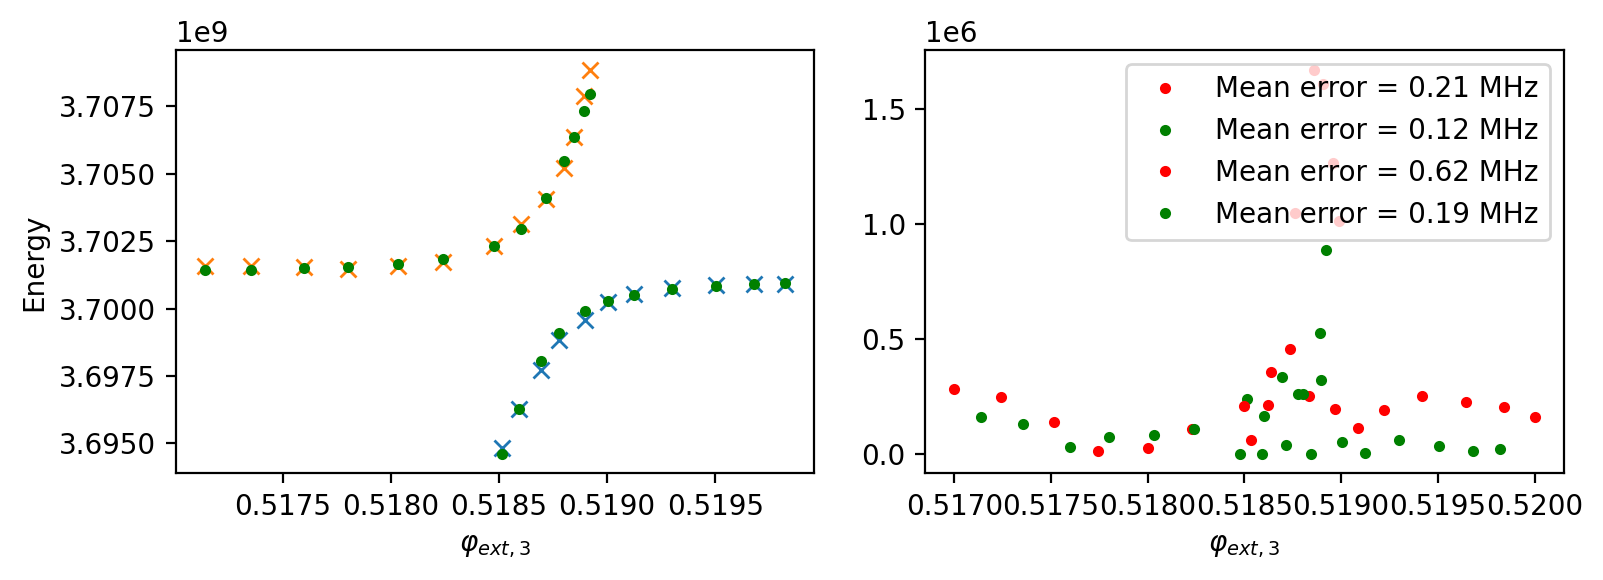

In [151]:
φ_ext_opt, ω_opt = theoretical_spectrum(parameters_opt, data_set, out='spectrum')
fig, (ax1, ax2) = plt.subplots(dpi=200, figsize = [8,3], ncols=2)

for i in range(len(ω_exp)):
    ax1.plot(φ_ext_opt[i], ω_exp[i]*1e9, 'x')
    ax1.plot(φ_ext_opt[i], ω_opt[i]*1e9, '.g')
ax1.set_ylabel('Energy')
ax1.set_xlabel(r'$\varphi_{ext,3}$')

for i in range(len(ω_exp)):
    ax2.plot(φ_ext_guess[i], np.abs(ω_guess[i]*1e9-ω_exp[i]*1e9), 'r.' , label = f'Mean error = {np.abs(ω_guess[i]*1e9-ω_exp[i]*1e9).mean()/1e6:.2f} MHz' )
    ax2.plot(φ_ext_opt[i], np.abs(ω_opt[i]*1e9-ω_exp[i]*1e9), 'g.'   , label = f'Mean error = {np.abs(ω_opt[i]*1e9-ω_exp[i]*1e9).mean()/1e6:.2f} MHz'  )
ax2.legend()
ax2.set_xlabel(r'$\varphi_{ext,3}$')

fig.tight_layout()

Optimization for initial conditions 1

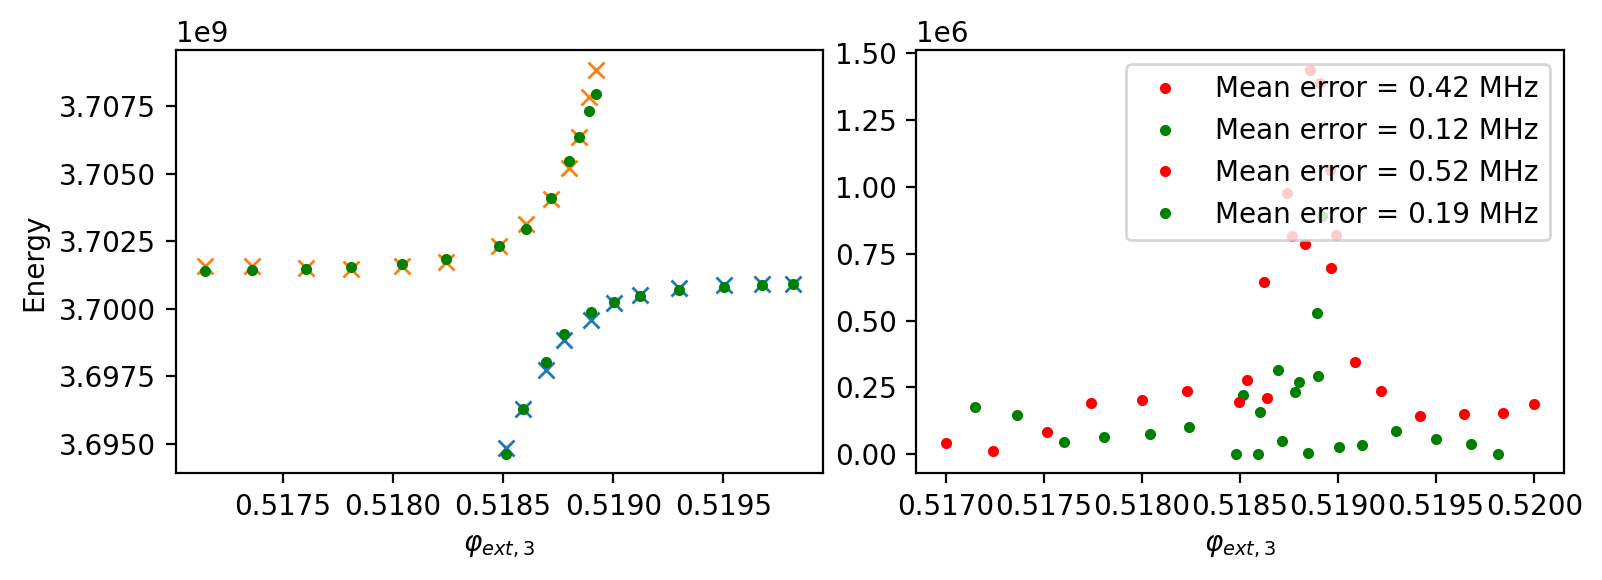

# Qubit 1 - Qubit 2 - Qubit 3
Below, we fix q1 at its half-flux point around 3.7 GHz, move q2 on resonance, and then sweep q3 through 3.7 GHz.

In [218]:
experiment_name = 'qubit_1_qubit_2_qubit_3'
method = 'SlSQP'
load = False


### Load spectral data and theoretical model

In [211]:
ω_exp, I_exp = fits.get_experimental_spectrum(experiment_name)

In [212]:
theoretical_spectrum = fits.get_theoretical_spectrum(experiment_name)

## Guess parameters and set bounds

In [213]:
CF_1, LF_1, EJ_1, _, _= np.load(os.getcwd() + opt_dir +  'qubit_1' + '.npz')['parameters_opt']
CF_2, LF_2, EJ_2, _, _= np.load(os.getcwd() + opt_dir +  'qubit_2' + '.npz')['parameters_opt']
CF_3, LF_3, EJ_3, _, _= np.load(os.getcwd() + opt_dir +  'qubit_3' + '.npz')['parameters_opt']
LF_1-=0.065

In [304]:
#This set of qubit_3 propperties fits way better than the other we have
CF_3, LF_3, EJ_3 = (26.469686661169657, 30.0, 5.780487830155092)

In [205]:
# Initial conditions 1
CF_1, LF_1, EJ_1 = (25.46, 28.11, 5.18)
LF_1-=0.0275

# Initial conditions 2
# CF_1, LF_1, EJ_1 = (32.15, 22.06, 6.19)
# LF_1-=0.07

In [305]:
φ_ext_i = 5.47014884e-01
φ_ext_f = 5.49545749e-01

C_int_12 = 15099.771
C_int_23 = 13140.112
C_int_13 = 200000.000

nmax_f = 8

data_set = [I_exp, ω_exp, φ_ext_i, φ_ext_f, nmax_f]
parameters_guess = [C_int_12, C_int_23, C_int_13, LF_1, CF_1, EJ_1, CF_2, LF_2, EJ_2, CF_3, LF_3, EJ_3]
parameter_names =  ['C_int_12', 'C_int_23', 'C_int_13', 'LF_1', 'CF_1', 'EJ_1', 'CF_2', 'LF_2', 'EJ_2', 'CF_3', 'LF_3', 'EJ_3']
bounds = fits.create_bounds(parameters_guess)

In [306]:
φ_ext_guess, ω_guess = theoretical_spectrum(parameters_guess, data_set, out='spectrum')
fig, ax = plt.subplots(dpi=150)

for i in range(len(ω_exp)):
    ax.plot(φ_ext_guess[i], ω_exp[i]*1e9, 'x')
    ax.plot(φ_ext_guess[i], ω_guess[i]*1e9, '.')

ValueError: too many values to unpack (expected 5)

## Optimize or load previous optimization

In [219]:
data_set_path = os.path.join(os.getcwd() + opt_dir, experiment_name + '_data_set.pkl')
parameters_path = os.getcwd() + opt_dir + experiment_name + '.npz'
if load:
    with open(data_set_path, 'rb') as f:
        data_set = pickle.load(f)
    parameters_opt, parameters_guess, bounds = fits.load_optimization_results(experiment_name)
else:
    with open(data_set_path, 'wb') as f:
        pickle.dump(data_set, f)
    parameters_opt = minimize(theoretical_spectrum, parameters_guess, data_set, bounds=bounds, method=method).x
    np.savez(parameters_path, parameters_opt=parameters_opt,
             parameters_guess = np.array(parameters_guess), bounds=np.array(bounds))

0.04558397184692664
0.04558397184516272
0.0455839718414075
0.04558397184576135
0.04558396737131387
0.045583970111783056
0.04558396150500377
0.04558397186288543
0.04558397185027685
0.045583971848036864
0.04558398133226005
0.04558398369707062
0.045583994889040635
12.683745161662715
1.1773046762313562
0.12416448144893666
0.04872197941944778
0.044912867954624236
0.0449128679563402
0.04491286795216043
0.04491286795689797
0.04491288930271553
0.0449128762908626
0.04491291726536106
0.044912867860813055
0.0449128677085775
0.044912867555446656
0.04491287790955534
0.044912880381139164
0.04491289210379401
6.972316297361583
0.9578911161864112
0.14483470152003308
0.026586040428056013
0.026586040426860524
0.02658604042441093
0.026586040427727387
0.02658602718183234
0.026586035280802722
0.02658600982702497
0.02658604051117175
0.026586040563018276
0.026586040637762043
0.026586031504348018
0.026586029284001444
0.0265860186183855
0.014428891746979478
0.014428891746375516
0.014428891748087924
0.0144288917

In [222]:
print('Guessed parameters \n')
[print(name + f' = {value:.3f}') for name, value in zip(parameter_names, parameters_guess)];
print('\n')
print('Optimized parameters \n')
[print(name + f' = {value:.3f}') for name, value in zip(parameter_names, parameters_opt)];

Guessed parameters 

C_int_12 = 15099.771
C_int_23 = 13140.112
C_int_13 = 200000.000
LF_1 = 22.397
CF_1 = 31.587
EJ_1 = 6.105
CF_2 = 22.197
LF_2 = 20.603
EJ_2 = 9.465
CF_3 = 26.085
LF_3 = 30.465
EJ_3 = 5.719


Optimized parameters 

C_int_12 = 15099.770
C_int_23 = 13140.112
C_int_13 = 200000.000
LF_1 = 22.397
CF_1 = 31.578
EJ_1 = 6.108
CF_2 = 22.184
LF_2 = 20.601
EJ_2 = 9.467
CF_3 = 26.088
LF_3 = 30.464
EJ_3 = 5.692


In [223]:
φ_ext_opo, ω_opt = theoretical_spectrum(parameters_opt, data_set, out='spectrum')

Text(0.5, 0, '$\\varphi_{ext,3}$')

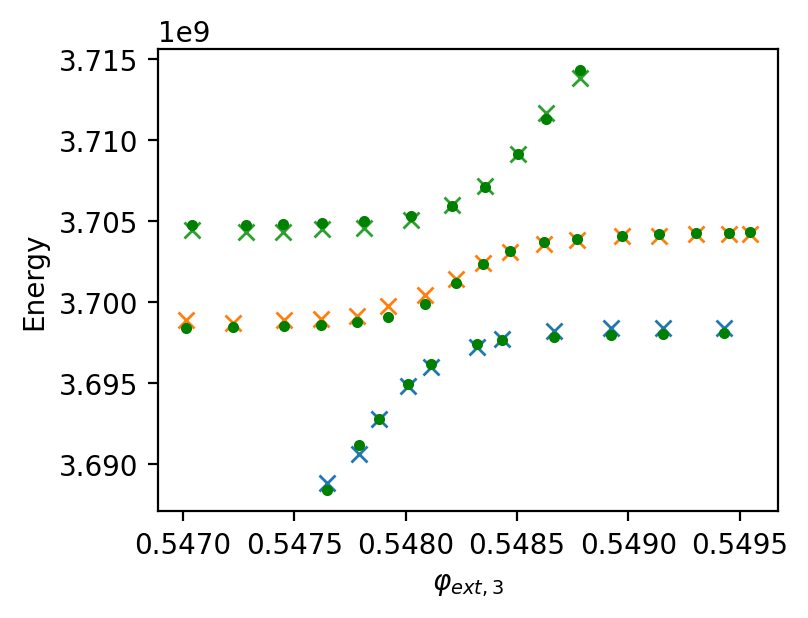

In [224]:
fig, ax = plt.subplots(dpi=200, figsize = [4,3])

for i in range(len(ω_exp)):
    ax.plot(φ_ext_guess[i], ω_exp[i]*1e9, 'x')
    # ax.plot(φ_ext_guess[i], ω_guess[i]*1e9, '.r')
    ax.plot(φ_ext_opo[i], ω_opt[i]*1e9, '.g')
ax.set_ylabel('Energy')
ax.set_xlabel(r'$\varphi_{ext,3}$')

# Estimate circuit capacitances from fits

In [314]:
CF_1, _, _, _, _= np.load(os.getcwd() + opt_dir +  'qubit_1' + '.npz')['parameters_opt']
C_int_11, CR_1, _, _, _ = np.load(os.getcwd() + opt_dir +  'resonator_1' + '.npz')['parameters_opt']
CF_2, _, _, _, _= np.load(os.getcwd() + opt_dir +  'qubit_2' + '.npz')['parameters_opt']
CR_2, _, _, _, _ = np.load(os.getcwd() + opt_dir +  'resonator_2' + '.npz')['parameters_opt']
CF_3, _, _, _, _= np.load(os.getcwd() + opt_dir +  'qubit_3' + '.npz')['parameters_opt']
C_int_33, CR_3, _, _, _ = np.load(os.getcwd() + opt_dir +  'resonator_3' + '.npz')['parameters_opt']
C_int_12, _, _, _ = np.load(os.getcwd() + opt_dir +  'qubit_1_qubit_2' + '.npz')['parameters_opt']
C_int_12, C_int_23, C_int_13 = np.load(os.getcwd() + opt_dir +  'qubit_1_qubit_2_qubit_3' + '.npz')['parameters_opt'] 

In [315]:
C_inv = np.array([[CF_1**-1     ,C_int_11**-1   ,C_int_12**-1   ,C_int_12**-1   ,C_int_13**-1   ,C_int_13**-1   ],
                  [C_int_11**-1 ,CR_1**-1       ,C_int_12**-1   ,C_int_12**-1   ,C_int_13**-1   ,C_int_13**-1   ],
                  [C_int_12**-1 ,C_int_12**-1   ,CF_2**-1       ,0              ,C_int_23**-1   ,C_int_23**-1   ],
                  [C_int_12**-1 ,C_int_12**-1   ,0              ,CR_2**-1       ,C_int_23**-1   ,C_int_23**-1   ],
                  [C_int_13**-1 ,C_int_13**-1   ,C_int_23**-1   ,C_int_23**-1   ,CF_3**-1       ,C_int_33**-1   ],
                  [C_int_13**-1 ,C_int_13**-1   ,C_int_23**-1   ,C_int_23**-1   ,C_int_33**-1   ,CR_3**-1       ]])

In [316]:
C_mat = np.linalg.inv(C_inv)

In [317]:
matrix = C_mat
max_len = 0
for row in matrix:
    for num in row:
        num_str = f"{num:.4g}"  # Using 4 significant digits for this example
        if len(num_str) > max_len:
            max_len = len(num_str)

# Print the matrix with the numbers properly aligned
for row in matrix:
    for num in row:
        print(f"{num:>{max_len}.4g}", end=' ')
    print()  # New line at the end of each row

     25.48    -0.3456   -0.03711   -0.01053  -0.003201  -0.001345 
   -0.3456      7.486   -0.01054  -0.002991 -0.0009095  -0.000382 
  -0.03711   -0.01054      22.45  5.182e-05   -0.04555   -0.01913 
  -0.01053  -0.002991  5.182e-05      6.368   -0.01292  -0.005428 
 -0.003201 -0.0009095   -0.04555   -0.01292      26.47    -0.2291 
 -0.001345  -0.000382   -0.01913  -0.005428    -0.2291      11.25 


In [318]:
CF_1_single, _, _, _, _= np.load(os.getcwd() + opt_dir +  'qubit_1_single_1' + '.npz')['parameters_opt']
CR_1_single, _, _, _, _ = np.load(os.getcwd() + opt_dir +  'resonator_1_single_1' + '.npz')['parameters_opt']
CF_1_single, CR_1_single

(24.377436446888616, 7.212070212090448)

In [319]:
CF_1 - CF_1_single

1.0845230695724553

In [320]:
CR_1 - CR_1_single

0.26898176592132916

In [321]:
C_12 = -C_mat[0,2]*4
C_12

0.14842961677055738

In [322]:
C_23 = -C_mat[2,4]*4
C_23

0.1822087337868481

In [323]:
import sympy as sym

In [324]:
C_F_1, C_F_2, C_F_3, C_R_1, C_R_2, C_R_3, C_C = sym.symbols('C_F_1, C_F_2, C_F_3, C_R_1, C_R_2, C_R_3, C_C', real=True, positive=True, nonzero=True)

In [325]:
C_mat_sym = sym.Matrix([[C_F_1 + C_C/4  ,-C_C / 4       ,-C_C / 4       ,-C_C / 4       , 0             , 0             ],
                        [-C_C / 4       , C_R_1 + C_C/4 ,-C_C / 4       ,-C_C / 4       , 0             ,0              ],
                        [-C_C / 4       ,-C_C / 4       , C_F_2 + C_C/2 , 0             ,-C_C / 4       ,-C_C / 4       ],
                        [-C_C / 4       ,-C_C / 4       , 0             , C_R_2 + C_C/2 ,-C_C / 4       ,-C_C / 4       ],
                        [0              ,0              ,-C_C / 4       ,-C_C / 4       ,C_F_3 + C_C/4  ,-C_C / 4       ],
                        [0              ,0              ,-C_C / 4       ,-C_C / 4       ,-C_C / 4       ,C_R_3 + C_C/4  ]])

In [326]:
C_inv_sym = C_mat ** -1
sym.simplify(C_inv_sym)

[[0.0392495574423254, -2.89372193753105, -26.9487996198441, -94.987175450752, -312.36859600154, -743.756432965905], [-2.89372193753105, 0.133587215107005, -94.8560687755659, -334.341795347299, -1099.49450230171, -2617.92036576402], [-26.9487996198441, -94.8560687755659, 0.0445525599742132, 19297.7301280333, -21.9528445034874, -52.270201071328], [-94.987175450752, -334.341795347299, 19297.7301280333, 0.157036549234873, -77.3777950005736, -184.238215803582], [-312.36859600154, -1099.49450230171, -21.9528445034874, -77.3777950005736, 0.0377722377135085, -4.36584255512601], [-743.756432965905, -2617.92036576402, -52.270201071328, -184.238215803582, -4.36584255512601, 0.0888746226309023]]

In [326]:
def hamiltonian_qubit_C_qubit_C_qubit(coupling_capacitances, params_1='load', params_2='load', params_3='load', nmax_r=5, nmax_f=10):
    '''
    params_1, params_2 and params_3 can be either the string 'load', in which case the corresponding parameters for each circuit are loaded from those of the fits,
    or a list of parameters
    '''
    if params_1 == 'load':
        CF_1, LF_1, EJ_1, _, _ = np.load(os.getcwd() + opt_dir +  'qubit_1' + '.npz')['parameters_opt']
        C_int_11, CR_1, LR_1, _, _ = np.load(os.getcwd() + opt_dir +  'resonator_1' + '.npz')['parameters_opt']
    

# Full spectrum

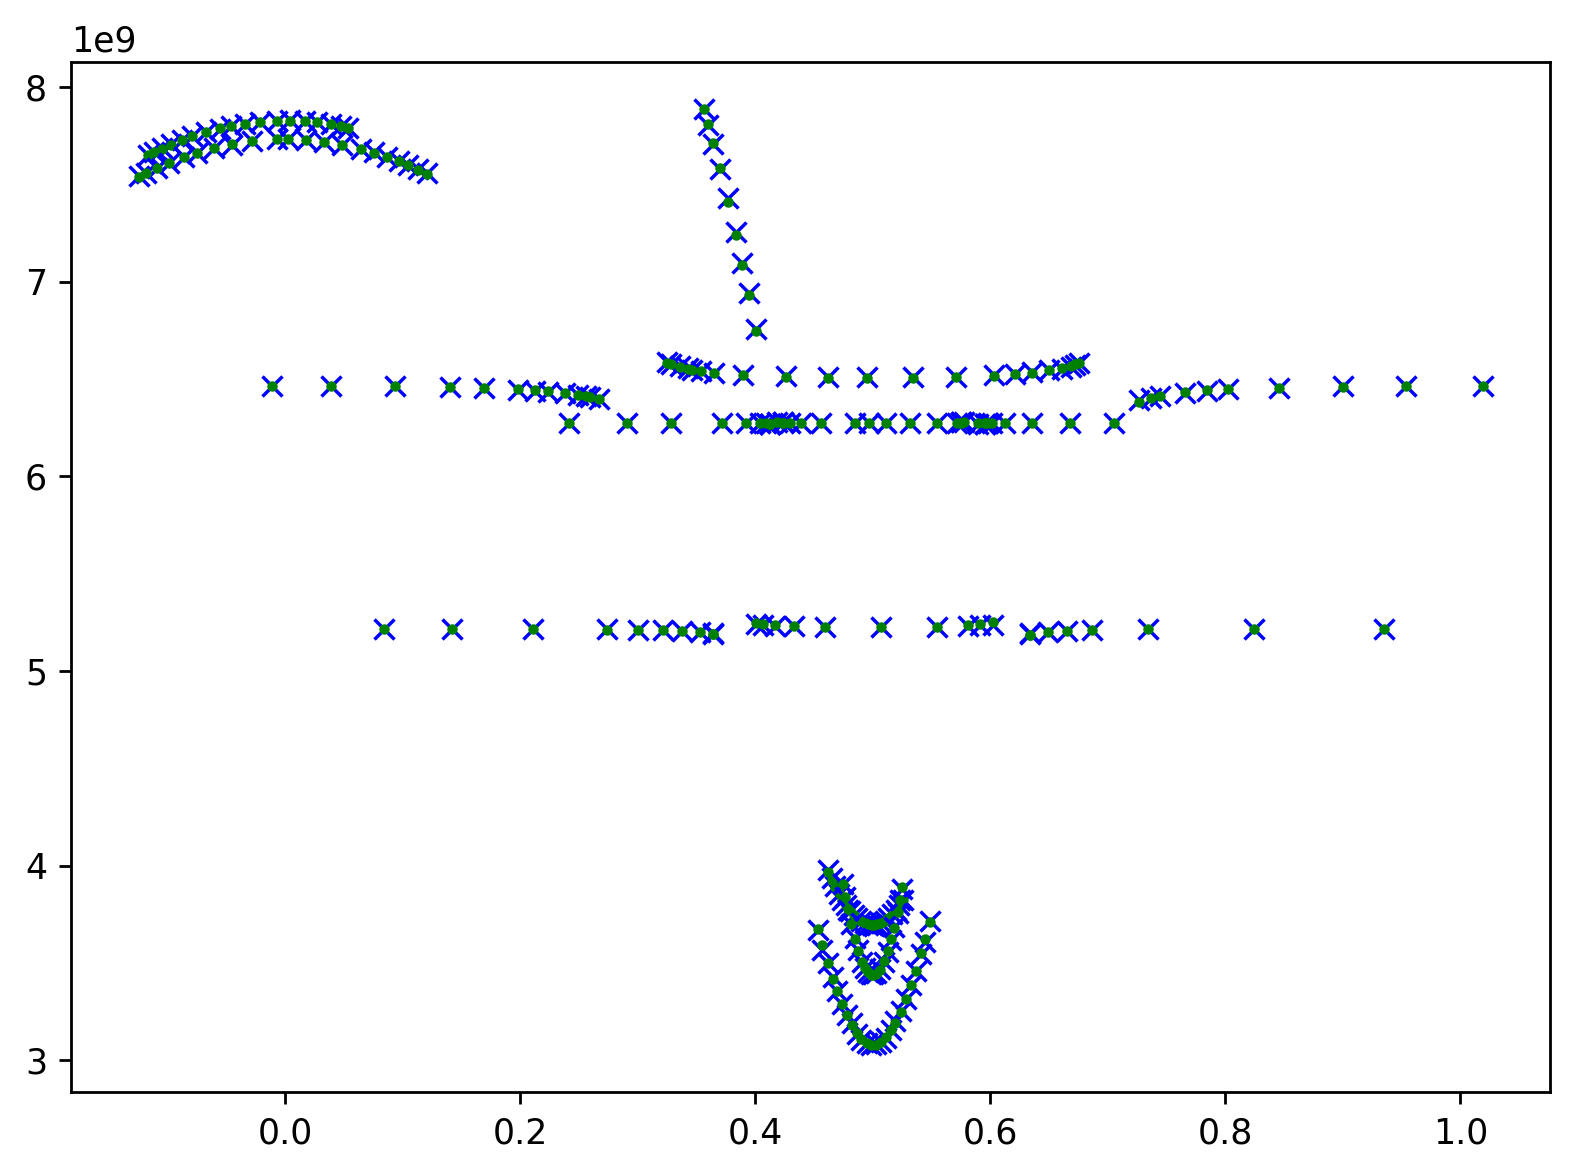

In [330]:
experiment_names = ['qubit_1', 'resonator_1', 'qubit_2', 'resonator_2', 'qubit_3', 'resonator_3']

fig, ax = plt.subplots(dpi=250)

for experiment_name in experiment_names:
    _, ω_exp, _, _, _ = fits.get_experimental_spectrum(experiment_name)
    theoretical_spectrum = fits.get_theoretical_spectrum(experiment_name)
    parameters_path = os.getcwd() + opt_dir + experiment_name + '.npz'
    parameters_opt = np.load(parameters_path)['parameters_opt'] 
    data_set_path = os.path.join(os.getcwd() + opt_dir, experiment_name + '_data_set.pkl')
    with open(data_set_path, 'rb') as f:
        data_set = pickle.load(f)
        
    φ_ext_opt , ω_opt = theoretical_spectrum(parameters_opt, data_set, out='spectrum')
    ax.plot(φ_ext_opt, ω_exp, 'xb')
    ax.plot(φ_ext_opt, ω_opt, '.g', markersize=4)
   
fig.tight_layout()

In [ ]:
    elif experiment_name == 'qubit_1_qubit_2':
        def qubit_qubit_crossing_spectrum(parameters, data_set, out='error'):
            C_int, φ_ext_i, φ_ext_f, LF_1 = parameters
            CF_1, EJ_1, CF_2, LF_2, EJ_2, I_exp, ω_exp, indices_0, indices_1, nmax_f = data_set

            qubit_1 = sq_ext.sq_fluxonium(C_F_eff=CF_1, L_F_eff=LF_1, EJ=EJ_1, nmax_f=nmax_f)
            H_1 = qubit_1.hamiltonian()
            Q_1 = qubit_1.charge_op(0)
            I = qt.identity(H_1.shape[0])

            qubit_2 = sq_ext.sq_fluxonium(C_F_eff=CF_2, L_F_eff=LF_2, EJ=EJ_2, nmax_f=nmax_f)
            loop = qubit_2.loops[0]

            I_unitary = (I_exp - I_exp.min()) / (I_exp.max() - I_exp.min())
            Δ_φ_ext = φ_ext_f - φ_ext_i
            φ_ext_values = I_unitary * Δ_φ_ext + φ_ext_i
            ω_vs_φ_ext = np.zeros([len(φ_ext_values), 2])

            for i, φ_ext in enumerate(φ_ext_values):
                loop.set_flux(φ_ext)
                H_2 = qubit_2.hamiltonian()
                Q_2 = qubit_2.charge_op(0)
                H = qt.tensor(H_1, I) + qt.tensor(I, H_2) + C_int ** -1 * fF ** -1 * qt.tensor(Q_1, Q_2)
                ω_vs_φ_ext[i] = sq_ext.diag(H, 3, remove_ground=True)[0][1:]

            if out == 'error':
                sort_indices = np.argsort(φ_ext_values)
                ω_vs_φ_ext_sorted = ω_vs_φ_ext[sort_indices]
                ω_exp_sorted = ω_exp[sort_indices]
                error_0 = np.sum(np.abs(ω_exp_sorted[indices_0] - ω_vs_φ_ext_sorted[indices_0, 0]))
                error_1 = np.sum(np.abs(ω_exp_sorted[indices_1] - ω_vs_φ_ext_sorted[indices_1, 1]))
                error = error_0 + error_1
                print(error)
                return error

            elif out == 'spectrum':
                return φ_ext_values, ω_vs_φ_ext * 1e9
        return qubit_qubit_crossing_spectrum